In [1]:
import pandas as pd
repo_dir = """C:\\Users\\yjpar\\Documents\\GitHub\\RGTM\\Cleaned\\"""


In [2]:
data = pd.read_csv(repo_dir + "MODEL_salesdate_w_medSale_saleVolume.csv")

In [3]:
data.

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ZipCode', 'BuildingCategory',
       'TaxClassAtTimeOfSale', 'Baths', 'Beds', 'YearBuilt',
       'NumComplaints3moPointOneMile', 'NumFelonies3moPointOneMile',
       'min_dist_park', 'min_dist_subway', 'SaleDate', 'SalePrice', 'AptNum',
       'BOM_DATE', 'MedianSalesPrice', 'SalesVolume'],
      dtype='object')

In [4]:
original = pd.read_csv(repo_dir + "merged_manhattan_cleanup.csv")

C:\Users\yjpar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
original.SalePrice = original.SalePrice.apply(lambda x : float(x.replace(",","").strip()) if isinstance(x,str) else x)

In [12]:
max(original.SalePrice)

4111111766.0

In [21]:
sorted(list(original.SalePrice))[-20:]

[220500000.0,
 227250000.0,
 227250000.0,
 237500000.0,
 239114603.0,
 239958219.0,
 260000000.0,
 260800000.0,
 270000000.0,
 276000000.0,
 287000000.0,
 290000000.0,
 290000000.0,
 316000000.0,
 390000000.0,
 416100000.0,
 555000000.0,
 620000000.0,
 1345485019.0,
 4111111766.0]

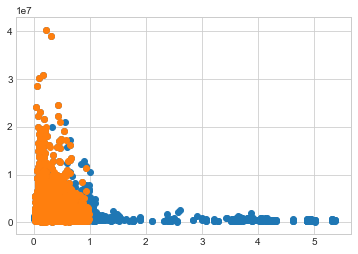

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


In [23]:
original1 = original[original.SalePrice<=1e9]

In [28]:
original1 = original1[original1.ZipCode!=0]

In [33]:
from pandas.tseries.offsets import DateOffset

In [34]:
data = data.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])

In [36]:
data1 = data.copy(deep=True)

In [37]:
data1.SaleDate = pd.to_datetime(data1.SaleDate)
data1["1YrDate"] = data1.SaleDate.apply(lambda x : x - DateOffset(year=1))

In [39]:
original1.SaleDate = pd.to_datetime(original1.SaleDate)

In [85]:
#Filter out Building Sales:
original2 = original1[~((original1["AptNum"].isna())&(original1.BuildingCategoryNum.isin([6,7,8,9,10,12,13,14,15,16])))
                     ].reset_index(drop=True)

In [87]:
def calcAvPriceZipCode(dt, zipcode):
    temp = original2[(original2.SaleDate.between(pd.to_datetime(dt-DateOffset(years=1)), dt))&
                    (original2.ZipCode == zipcode)&]
    print(len(temp))
    return temp.SalePrice.mean()
    

In [88]:
data1["AvgPriceZipCode1Yr"] = 0

In [89]:
for i in range(len(data1)):
    data1.loc[i,"AvgPriceZipCode1Yr"]=calcAvPriceZipCode(data1.loc[i,"SaleDate"],data1.loc[i,"ZipCode"])
    print(data1.loc[i,"AvgPriceZipCode1Yr"])

233
1925544.2360515022
243
1697852.7530864198
231
1934380.1168831168
93
907324.3440860215
92
832071.8695652174
28
935421.3214285715
13
964867.2307692308
28
913849.8928571428
29
908717.1379310344
28
1008778.4642857143
33
884205.9393939395
33
1454223.2727272727
32
1232309.59375
33
1358083.878787879
33
1182360.8181818181
32
1269549.28125
32
1266830.53125
25
957271.88
25
951311.88
63
432328.79365079367
67
428749.46268656716
63
448304.98412698414
58
439891.6206896552
61
444380.5573770492
66
436957.7878787879
64
436995.53125
81
433173.14814814815
67
457517.17910447763
68
430532.5588235294
66
447340.01515151514
62
450858.29032258067
63
446678.0
74
470366.02702702704
9
1847654.2222222222
56
1089046.875
47
1039076.4042553192
43
985653.2790697674
47
1039927.4680851063
49
1077051.0204081633
48
1050983.1458333333
47
1017046.6170212766
44
976945.25
54
1061231.4814814816
50
1018431.82
446
1474855.307174888
458
1592293.9082969432
459
1473579.2135076253
451
1458035.356984479
132
2301786.856060606
140


133
2906772.736842105
132
2373718.6742424243
143
2380627.811188811
137
2189927.423357664
142
2422625.1901408453
232
1864531.8620689656
241
1680735.3485477178
64
3724670.484375
58
3257157.5172413792
130
2949813.6461538463
82
886874.731707317
102
866200.0294117647
66
3112504.8181818184
287
6307887.362369338
482
1709443.4460580912
301
2076065.3222591362
475
1886843.8378947368
475
1886843.8378947368
363
1656593.1570247933
483
1947096.9358178054
346
1479371.5317919075
307
1372165.1693811074
361
1576720.3130193907
468
1929468.8995726495
334
1422091.3562874252
303
1455725.105610561
363
1657837.0606060605
360
1604647.7222222222
345
1457781.7391304348
368
1675051.230978261
368
1608287.5923913044
380
1642692.5
467
1935067.1199143468
355
1537089.532394366
479
2011669.3528183715
481
2061367.7130977132
482
2037965.244813278
466
1990275.652360515
480
1798560.5791666666
472
1918565.3622881356
472
1958144.6165254237
379
1642889.5778364115
345
1485723.3333333333
347
1521802.6916426513
300
1516512.76333

558
1374677.0663082437
522
1540425.4770114943
556
1379803.6223021583
524
1505921.2614503817
556
1379786.106115108
529
1532629.674858223
523
1574543.2428298278
718
2242477.08913649
529
1514308.315689981
545
1530222.662385321
523
1529594.3556405355
543
1520362.226519337
558
1447041.0806451612
521
1500681.2226487524
545
1524215.8422018348
522
1511709.7528735632
532
1555492.6616541354
558
1545380.1039426522
541
1524378.3530499076
543
1520362.226519337
536
1515241.240671642
522
1519524.2164750958
558
1529770.6254480288
553
1434755.1627486437
530
1511728.4886792453
533
1525479.9343339587
528
1528555.4299242424
555
1546119.5513513514
525
1522098.3638095239
554
1431390.9837545126
521
1535205.5642994242
535
1522773.431775701
538
1467819.786245353
526
1512140.0019011407
540
1523868.8685185185
533
1563163.444652908
547
1438502.0201096893
558
1357965.5967741935
533
1563163.444652908
537
1469333.417132216
533
1563163.444652908
527
1574817.1081593928
554
1377525.653429603
553
1434755.1627486437
519


1863298.4642857143
423
2001992.964539007
433
2025747.2678983833
442
1855999.0950226244
429
1780651.5314685316
438
1901875.8812785388
457
1913311.7877461708
437
1782933.1556064072
437
1850732.4942791762
437
1771903.5171624713
441
1790070.3310657595
437
1764689.6064073227
442
1857913.1221719456
433
1960558.5612009238
435
2012220.8436781608
455
1873796.0923076924
456
1919512.7521929825
451
1915693.6031042128
401
1319990.5885286783
386
1320191.0699481866
410
1210053.6341463414
402
1235813.6218905472
404
1239240.108910891
408
1208740.1715686275
408
1210786.7401960783
379
1319164.6754617414
378
1319959.0238095238
401
1235497.3391521196
377
1318693.6631299735
452
1897419.942477876
402
1337963.248756219
405
1206241.950617284
410
1255978.943902439
397
1314956.1939546599
417
1225575.268585132
404
1247909.0891089109
382
1319408.3926701571
384
1323250.7213541667
380
1310013.3736842105
421
1242316.8313539193
387
1316016.7700258398
404
1253743.2475247525
411
1233641.695863747
406
1232766.8374384237


174
1024919.0747126436
181
1085598.4475138122
431
1443878.517401392
431
1443878.517401392
458
1422766.6877729257
458
1422766.6877729257
474
1396337.276371308
474
1396337.276371308
401
1403366.4438902743
428
1511040.738317757
395
1418991.3164556962
400
1406746.425
400
1406746.425
410
1413147.7585365854
178
1071826.573033708
183
1146896.956284153
183
1146896.956284153
207
1099672.5845410628
207
1099672.5845410628
344
909947.1308139535
370
845638.1675675676
370
845638.1675675676
342
909656.6959064327
176
1067091.8352272727
176
1067091.8352272727
442
1430547.834841629
442
1430547.834841629
452
1411575.5376106196
452
1411575.5376106196
398
1412184.8492462311
396
1419410.5303030303
400
1425623.0525
396
1419410.5303030303
398
1404267.7638190954
398
1404267.7638190954
398
1412184.8492462311
192
1142277.828125
192
1142277.828125
177
1075582.8418079095
180
1046384.0555555555
380
865263.1342105264
380
865263.1342105264
330
908488.6606060606
378
868284.3677248678
378
868284.3677248678
371
858163.0

32
1005526.9375
34
933290.0588235294
34
976260.6470588235
39
741686.4615384615
55
957034.5818181818
64
904271.90625
64
904271.90625
55
956889.1272727273
55
956889.1272727273
62
1199917.7741935484
59
1172837.3220338982
64
1218514.09375
17
624764.7058823529
17
624764.7058823529
14
558142.8571428572
33
988238.2424242424
38
936627.947368421
38
936627.947368421
82
526014.7926829269
76
537089.3552631579
81
530817.4444444445
77
522281.987012987
77
522281.987012987
78
524765.5512820513
78
524765.5512820513
74
471503.1081081081
79
522895.10126582277
80
517546.4125
82
526014.7926829269
81
529619.913580247
75
532321.52
75
470416.4
81
519155.16049382713
81
519155.16049382713
75
542321.52
78
526987.217948718
78
526987.217948718
77
536802.4805194805
80
532812.5375
80
532812.5375
57
1075089.9122807018
70
1334046.0714285714
70
1334046.0714285714
50
1001572.5
48
1028471.3541666666
48
1018679.6875
55
1059293.1818181819
58
1063364.2241379311
69
1296394.5652173914
69
1296394.5652173914
49
1010951.53061224

215
1413998.0604651163
652
1998481.2975460123
74
872460.1621621621
186
1156326.0376344086
186
1156326.0376344086
137
1285759.9416058394
398
1416103.190954774
352
1439673.15625
102
662580.0392156863
60
883252.5333333333
386
2387309.134715026
50
810753.04
57
802107.9298245613
182
1060819.3956043955
103
994313.1262135922
305
1976817.7967213115
94
657527.2765957447
81
657227.9506172839
385
1501378.6181818182
397
1415422.0906801007
385
1501378.6181818182
403
1421267.9280397021
403
1421267.9280397021
263
1434874.4410646388
582
1678874.144329897
183
1080903.9234972678
98
1007859.7142857143
36
825548.4722222222
11
771772.7272727273
191
689702.7696335078
357
703430.6302521009
341
911023.8211143696
206
1436078.0388349514
120
2341808.4833333334
113
2125299.2123893807
115
2233505.843478261
51
1590546.6470588236
182
2490433.730769231
25
1888881.56
110
1769497.7545454546
53
1867035.4528301887
223
3623279.183856502
512
1480158.9765625
404
1402551.9183168316
404
1402551.9183168316
75
1375714.733333333

1899912.5352839932
297
1791583.4713804715
585
1912985.900854701
120
1712724.5416666667
347
1746830.4985590777
270
1796317.7444444445
387
1745471.6821705427
154
1900361.525974026
291
1516193.64604811
393
1770914.1908396946
238
1840148.4957983193
350
1785223.0142857144
141
1733827.2695035462
58
1793276.2758620689
370
1520805.3081081081
156
1891735.0961538462
54
1775535.8703703703
371
2246446.7628032346
316
1900398.1265822784
153
1979115.5947712418
293
1947270.6757679181
141
1999809.829787234
203
1843489.3743842365
179
1807727.0558659218
571
1862936.891418564
112
1681142.3660714286
516
1898875.1647286823
207
1857359.1449275361
592
1938700.9239864864
113
1674220.7522123894
442
1981357.825791855
442
1981357.825791855
386
1789849.1658031088
460
1940554.9108695653
67
1796907.4776119404
366
1402441.1202185792
94
1671553.574468085
293
1566267.1706484642
149
2001497.8926174496
454
1874860.013215859
185
1952206.7243243244
42
1680534.2142857143
371
2145803.1725067385
307
1931512.4039087947
459
200

183
983018.956284153
489
1468477.91002045
431
1447860.1044083526
431
1447860.1044083526
187
1072595.8181818181
192
1142277.828125
192
1142277.828125
399
767588.8771929825
463
1452918.7494600432
673
1902818.6983655274
458
1434971.7445414846
657
1908781.2694063927
501
1465406.4331337325
601
1699036.2728785358
180
1133816.7777777778
183
1082786.7213114754
300
1969844.8666666667
135
2908498.162962963
142
3202670.5070422534
137
2961769.01459854
143
2427493.79020979
131
3106559.175572519
119
2492857.3277310925
138
3010669.2391304346
136
2979877.6102941176
141
2948448.2411347516
453
1432946.0463576159
477
1479773.7044025157
456
1451940.9188596492
512
1476716.1640625
512
1466637.580078125
400
1415218.925
478
1427367.5481171547
518
1385599.2413127413
487
1417940.1026694046
482
1397875.1659751036
480
1426975.7583333333
412
1380501.4490291262
412
1380501.4490291262
137
3330892.6715328465
269
1867290.657992565
269
2013516.6431226765
316
2233315.6265822784
276
1924652.5471014492
346
2334593.3959537

1763169.3279816513
424
1757676.0235849055
441
1745383.5578231292
443
1798092.7246049661
440
1807147.9704545455
437
1820220.5011441647
442
1800947.0067873304
437
1784750.748283753
440
1547090.4022727273
529
1290542.9924385634
423
1495618.1725768321
388
1261585.6262886599
407
1610587.9189189188
431
1772093.4083526682
453
1909455.931567329
420
1494098.7761904763
391
1355432.6445012789
407
1610587.9189189188
406
1611192.815270936
401
1244390.7780548627
410
1252393.5780487806
405
1243679.9901234568
404
1596043.2400990098
445
1538888.7123595506
543
1254919.9594843462
405
1587022.1456790124
368
1382466.641304348
407
1260993.5307125307
403
1611390.2803970224
404
1265447.0717821782
425
1540817.8823529412
379
1241689.2427440633
404
1246018.2351485149
410
1252393.5780487806
114
472555.4035087719
92
599940.7065217391
129
762230.7596899224
113
657531.5752212389
131
766580.4045801527
92
506400.48913043475
102
560490.568627451
115
783611.7739130434
108
690668.4074074074
123
486218.7886178862
68
91500

188
1186443.180851064
173
1018097.1965317919
173
1018097.1965317919
169
1030849.8224852071
165
1044883.7272727273
168
1015896.9642857143
168
1015896.9642857143
183
1014288.606557377
183
1014288.606557377
228
972207.850877193
228
972207.850877193
228
972207.850877193
228
972207.850877193
98
904683.5306122449
101
997623.6237623763
99
1033842.1616161616
105
918819.8666666667
98
904683.5306122449
93
1078469.8279569892
93
1078469.8279569892
101
914485.0099009901
99
969302.8888888889
101
914881.0495049505
99
903020.0606060605
101
1082462.3168316833
103
932798.8932038835
100
995523.74
96
928093.375
96
927312.125
100
1006448.74
349
901874.2435530087
376
872276.9202127659
376
872276.9202127659
343
890360.4139941691
395
876135.4658227848
395
876135.4658227848
385
856590.9324675325
385
856590.9324675325
373
852656.8123324397
373
852656.8123324397
380
848797.3447368421
380
848797.3447368421
375
867362.992
375
867362.992
332
917454.7590361446
328
906547.881097561
330
916551.0
329
908217.9483282674


283
2254580.9469964663
329
2278645.8419452887
329
2278645.8419452887
314
1893781.2738853502
312
2283821.3525641025
312
2283821.3525641025
479
1914740.1607515658
489
1930501.3026584866
475
1934108.9894736842
473
1948252.4841437633
457
1954027.943107221
481
1919075.1933471933
486
1935819.0185185184
466
1831234.8454935623
472
1905354.5105932204
469
1775154.3326226012
535
1911305.7757009345
535
1911305.7757009345
542
1917088.8653136531
542
1917088.8653136531
680
2095523.45
460
1941129.8217391304
475
1866998.8168421052
471
1908142.6072186837
466
1916434.5879828327
478
1920236.479079498
463
1787907.9524838014
472
1905354.5105932204
491
1967283.6252545824
491
1967283.6252545824
463
1948267.3218142549
462
1897348.9567099568
462
1897348.9567099568
489
1930501.3026584866
562
1966663.4199288257
562
1966663.4199288257
461
1881792.7722342734
463
1787907.9524838014
478
1970834.4665271966
478
1970834.4665271966
486
1929428.059670782
458
1956455.6768558952
482
1911603.8112033196
474
1980904.799578059


340
2042024.4617647058
354
2060911.06779661
366
2274781.6857923497
421
2134926.703087886
421
2134926.703087886
360
2183529.3694444443
358
1954354.156424581
358
1954354.156424581
395
2086664.1620253164
395
2086664.1620253164
365
2125447.4273972604
401
1990823.6483790523
401
1990823.6483790523
383
1748347.7624020888
365
1949203.5287671234
365
1949203.5287671234
388
1719554.1417525774
370
1660704.881081081
429
1998791.1025641025
429
1998791.1025641025
388
1759984.1804123712
386
1760644.720207254
368
1650072.7282608696
419
2009888.322195704
419
2009888.322195704
442
1981357.825791855
442
1981357.825791855
349
1847516.693409742
347
1916200.939481268
352
1771471.7471590908
370
1989019.8648648649
370
1989019.8648648649
393
1751262.0992366413
347
1746830.4985590777
418
1987889.2511961723
418
1987889.2511961723
382
1712634.1884816755
366
1652810.4890710383
350
1919810.822857143
350
1919810.822857143
419
2009888.322195704
419
2009888.322195704
368
1695137.1875
349
1719008.753581662
370
1668924.3

451
1997843.0332594234
451
1997843.0332594234
462
1995699.3917748919
462
1995699.3917748919
445
2020447.6584269663
445
2020447.6584269663
365
2169581.673972603
336
1981110.0029761905
358
2283334.0698324023
362
2285456.0690607736
375
2239545.872
391
1773870.5549872122
347
1780716.9337175793
388
1759984.1804123712
388
1725635.3221649486
370
1698933.7432432433
368
1641746.7418478262
375
2018253.016
375
2018253.016
367
1692156.6348773842
347
1722576.5273775216
334
1387557.2604790418
334
1387557.2604790418
336
1790052.6964285714
358
1363980.2318435754
358
1363980.2318435754
312
1631205.689102564
316
1610711.6297468354
305
1477270.7344262295
305
1477270.7344262295
308
1598584.2694805195
290
1497635.6931034483
341
1384047.4281524927
341
1384047.4281524927
294
1568204.1870748298
352
1376307.3096590908
352
1376307.3096590908
438
2053648.7260273972
438
2053648.7260273972
386
2050730.1658031088
386
2050730.1658031088
439
2021115.9521640092
439
2021115.9521640092
461
2001264.9002169198
461
2001264

525
1684800.4
603
1658074.2537313432
603
1658074.2537313432
532
1561635.142857143
540
1625550.75
540
1625550.75
535
1611758.4878504672
521
1731348.1746641074
531
1640057.7231638418
531
1640057.7231638418
535
1612118.3028037383
530
1641556.4320754716
509
1624640.2927308448
586
1599621.1177474402
586
1599621.1177474402
509
1642417.884086444
509
1642417.884086444
536
1636075.1753731344
588
1609305.2295918367
588
1609305.2295918367
424
2000125.0566037735
410
2005598.3512195123
429
2003474.5477855478
429
2003474.5477855478
535
1613099.6112149532
622
1650385.4903536977
622
1650385.4903536977
545
1645539.56146789
525
1684800.4
631
1624688.500792393
631
1624688.500792393
535
1611758.4878504672
527
1576720.787476281
536
1608462.296641791
529
1628713.6502835539
523
1578611.5793499043
611
1658250.859247136
611
1658250.859247136
538
1646070.9275092937
541
1635182.608133087
509
1624640.2927308448
539
1609440.2448979593
583
1596840.437392796
583
1596840.437392796
538
1609626.936802974
614
1628696.70

388
1236329.6932989692
389
1354356.7480719795
421
1258517.9809976248
421
1258517.9809976248
390
1266757.5410256411
379
1376438.0290237467
371
1344087.9164420485
377
1377937.5358090186
422
1254406.4976303317
422
1254406.4976303317
383
1321424.5587467363
388
1236329.6932989692
391
1355984.0792838875
441
1247163.0839002267
441
1247163.0839002267
381
1313849.091863517
377
1381299.7692307692
375
1368559.32
373
1359701.018766756
392
1269720.818877551
386
1289514.7227979274
386
1289514.7227979274
390
1256006.771794872
372
1359442.1505376345
381
1317708.6719160106
383
1272758.963446475
383
1272758.963446475
388
1355825.451030928
379
1241306.6569920843
373
1359701.018766756
388
1354008.5103092783
386
1245116.3756476685
386
1244924.6658031088
426
1261524.7464788733
426
1261524.7464788733
375
1376919.0693333333
389
1278104.583547558
389
1278104.583547558
379
1376438.0290237467
390
1255711.9
379
1243990.364116095
385
1353912.4727272727
384
1285006.9869791667
384
1285006.9869791667
453
1246110.9977

241
1141710.439834025
232
1102279.5172413792
263
2305221.5513307983
383
3144511.7467362923
266
2297683.338345865
80
638359.7125
121
970184.652892562
80
638359.7125
112
988585.1160714285
112
988585.1160714285
137
1018583.9343065694
81
723441.6913580247
113
993553.3893805309
136
1031088.2279411765
89
859103.7640449438
93
853233.7096774194
86
860212.523255814
78
631811.2435897436
109
935683.7889908256
422
3491985.625592417
82
651021.6707317074
78
636554.8333333334
81
659577.4938271604
77
643359.3376623377
128
985777.3359375
102
926809.1470588235
77
643359.3376623377
137
1013058.3868613138
90
862113.7222222222
125
985379.992
282
2558765.6666666665
77
632969.7272727273
93
1984188.935483871
573
1650172.8708551484
104
1120717.5576923077
580
1675906.4689655174
556
1636699.652877698
589
1687874.298811545
551
1645063.5335753176
478
1392516.4728033473
478
1392516.4728033473
646
1821548.6640866874
93
2083613.8387096773
615
1737752.5479674796
668
1906779.1676646706
587
1683870.4633730834
563
162608

544
1635352.5514705882
667
1893677.8770614692
649
1863995.8674884439
579
1668881.2936096718
661
1891498.7034795764
650
1862074.3353846155
509
1483387.6542239685
332
2271482.4126506024
385
2448158.994805195
339
2254230.563421829
316
2233315.6265822784
315
2203688.3619047618
360
2346669.327777778
335
2223722.8686567163
333
2213009.4924924923
393
2440160.562340967
345
2282824.9304347825
315
2231346.6634920635
313
2191571.3546325876
368
2375789.4239130435
377
2434635.297082228
393
2575962.834605598
393
2469327.86259542
396
2436948.487373737
344
2349000.3168604653
354
2311643.54519774
398
2422189.9522613063
348
2336607.2270114943
395
2460653.129113924
343
2266360.3760932945
343
2266360.3760932945
375
2442017.3546666666
372
2371025.559139785
396
2436948.487373737
377
2434635.297082228
315
2231346.6634920635
309
2244562.132686084
392
2534665.576530612
312
2239284.2916666665
322
2254196.3229813664
360
2362817.938888889
367
2378384.2179836514
322
2254196.3229813664
312
2206912.9294871795
393
24

600
1887148.5233333334
607
1917405.1482701811
547
1984590.4734917732
581
1950509.3373493976
604
1925351.7996688741
660
2316997.3621212123
634
2316526.457413249
582
1940499.8711340206
603
1933096.9933665008
629
2114923.4992050873
556
2069842.8956834532
629
2114923.4992050873
605
1889818.226446281
555
2070774.1441441441
593
1922801.0741989883
587
1930649.9948892675
557
2070137.606822262
663
2306581.838612368
644
2316106.214285714
657
2295170.485540335
617
1989345.0972447325
612
1930742.5245098039
663
2316624.0708898944
574
1916711.7578397212
561
1865153.04456328
623
2016733.1589085073
590
1925249.2152542372
609
1922840.5993431855
581
1935906.2771084337
598
1889048.5183946488
550
2006676.3436363637
635
2136806.653543307
646
2318907.743034056
601
1876029.973377704
639
2316021.0594679187
635
2136806.653543307
610
1927185.9426229508
635
2136806.653543307
578
1907909.4775086506
555
2073768.7333333334
597
1883437.8274706868
665
2285885.351879699
565
2234614.5805309736
648
2287789.0802469137
55

1126463.75
115
1146412.147826087
106
1063053.3679245282
99
1091124.696969697
277
6312786.657039711
250
6405596.076
143
4862697.321678322
104
3867338.7115384615
170
7192646.647058823
170
7192646.647058823
266
6286709.665413534
245
6375689.873469388
241
6428526.975103734
136
7605035.139705882
144
7679069.909722222
155
7555427.058064516
14
1339684.857142857
42
1338930.761904762
183
4697199.453551913
169
4908174.230769231
162
5016148.75308642
183
4697199.453551913
41
4837843.804878049
90
4492765.0
119
4667354.672268908
124
4678798.338709678
138
7795192.239130435
327
6185944.070336391
301
6253262.594684386
305
6206572.265573771
119
4023036.6722689075
327
6198375.262996942
100
3888207.26
113
3995718.8141592923
135
7645257.622222222
260
6325983.492307693
277
6312786.657039711
324
6238421.947530864
119
4023036.6722689075
298
6327381.010067114
287
6307887.362369338
277
6312786.657039711
277
6312786.657039711
199
6702406.572864322
184
6925636.967391305
100
3713687.26
186
6896658.392473118
110
38

644
2064577.5388198758
448
1981357.720982143
452
1969456.325221239
576
1858666.1163194445
455
1843837.8351648352
446
1863864.831838565
449
1945082.2383073496
649
2053616.124807396
653
2054557.2205206738
476
1875125.8067226892
352
1349328.8153409092
471
1928051.4883227176
453
1779493.8520971301
462
2011795.1926406927
451
1765156.796008869
453
1845813.940397351
445
1874042.0561797754
473
1925834.8329809725
455
1843837.8351648352
457
1998392.864332604
468
1933543.5384615385
448
1851252.7120535714
444
1842148.0112612613
459
1979789.9281045753
459
1962159.111111111
461
1947096.1930585683
459
1972496.5729847495
460
1957494.2282608696
472
1925453.127118644
450
1822852.7
449
1942307.832962138
472
1918982.7881355933
502
1928933.9302788845
472
1891281.5338983051
580
1898616.8413793102
580
1894502.9017241378
629
2077345.0333863276
472
1887206.8707627119
499
1930756.1623246493
615
2028565.2016260163
610
2025964.6360655737
585
1912985.900854701
587
1924777.482112436
472
1891281.5338983051
482
18936

547
1957605.2851919562
659
2143678.8406676785
552
1945793.8641304348
798
2405655.560150376
838
2384360.281622912
806
2394162.163771712
660
2292880.653030303
796
2407604.4434673367
669
2289519.3109118086
677
2364812.503692762
777
2411870.532818533
676
2349188.5665680473
825
2386920.8775757574
788
2419138.2373096445
716
2254389.6117318436
673
2300988.209509658
747
2295103.995983936
696
2238087.317528736
715
2255178.8601398603
807
2404758.9330855017
696
2260714.893678161
664
2295767.1972891567
728
2261419.980769231
737
2296091.094979647
809
2400317.3102595797
722
2238614.497229917
672
2297780.3854166665
708
2272602.9124293784
703
2266882.8378378376
712
2255722.099719101
798
2404483.880952381
674
2354200.6661721068
658
2308543.189969605
715
2255178.8601398603
712
2267418.5224719103
748
2343684.7352941176
683
2284555.623718887
649
2185997.748844376
539
1916661.974025974
589
2069398.1714770799
660
2143190.809090909
511
1875169.3326810177
796
2416597.8530150754
788
2419138.2373096445
793
2412

578
2032974.875432526
647
2176830.7851622873
642
2178908.9065420562
648
2182978.9444444445
643
2176100.33903577
538
1922975.249070632
464
1257797.0043103448
482
1235125.8215767634
531
1256303.3013182674
482
1270161.531120332
479
1285291.4739039666
496
1260235.747983871
482
1235125.8215767634
666
2134007.4084084085
649
2185997.748844376
673
2114251.76077266
537
1922760.6312849163
570
1960469.6368421053
514
1898878.8287937744
583
2045163.668953688
646
2182395.5386996903
581
1989616.857142857
541
1945646.606284658
519
1913321.4104046242
666
2134007.4084084085
632
2163091.3670886075
604
2139157.490066225
640
2203720.721875
514
1902516.9610894942
517
1899601.1837524178
655
2153151.6885496182
524
1913051.1679389314
679
2117995.854197349
649
2190077.4545454546
541
1259205.2458410352
546
1255061.424908425
541
1257814.6210720888
539
1237775.5825602969
648
2182978.9444444445
589
2070111.0492359933
596
2072414.5251677851
632
2163091.3670886075
589
2070111.0492359933
641
2179195.8159126365
530
190

In [105]:
data1.to_csv(repo_dir+"data_pre_dummies.csv")


In [104]:
data1 = data1.drop_duplicates()

In [128]:
idx_df = pd.read_csv(repo_dir+"FINAL_MERGED_MANHATTAN.csv")

In [129]:
ids = idx_df[["SaleDate","Baths","Beds","AptNum","SalePrice","YearBuilt"]]
ids.SaleDate = pd.to_datetime(ids.SaleDate)
ids.AptNum =ids.AptNum.fillna("House")
ids = ids.drop_duplicates()
ids = ids.reset_index()


C:\Users\yjpar\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [169]:

ids = ids.rename(columns={"index":"INC_ID"})

data2 = data1.merge(ids, how="left", on=["SaleDate","Baths","Beds","AptNum","SalePrice","YearBuilt"])

print((data2.shape, data1.shape))

((7863, 19), (7863, 18))


In [170]:
data2.to_clipboard()

In [171]:
idx_df.columns

Index(['Inc_ID', 'Year', 'Neighborhood', 'BuildingCategoryNum',
       'BuildingCategoryDes', 'TaxClassAtPresent', 'Block', 'Lot',
       'BuildingClassAtPresent', 'StreetNum', 'StreetName', 'AptNum',
       'ZipCode', 'ResidentialUnits', 'CommercialUnits', 'TotalUnits',
       'LandSquareFeet', 'GrossSquareFeet', 'YearBuilt',
       'TaxClassAtTimeOfSale', 'BuildingClassAtTimeOfSale', 'SalePrice',
       'SaleDate', 'Beds', 'Baths', 'StreetAddress', 'GeoCode'],
      dtype='object')

In [172]:
df = pd.read_csv(repo_dir + "FINAL_MERGED_MANHATTAN.csv")
geo = df[["ZipCode","SaleDate","SalePrice","GeoCode","Beds","Baths"]]
geo.SaleDate = pd.to_datetime(geo.SaleDate)

In [173]:
data2=data2.merge(geo,how="left",on=["ZipCode","SaleDate","SalePrice","Beds","Baths"])

In [174]:
data2.to_csv(repo_dir + "data_pre_dummies_geocodes.csv")

In [149]:
park = pd.read_csv(repo_dir+"parks_final_geocode.csv")

In [181]:
park.GeoCode = park.GeoCode.apply(lambda x : (x[1],x[0]))

In [184]:
#data2.GeoCode=data2.GeoCode.apply(lambda x : eval(x))
data2 = data2.drop_duplicates().reset_index(drop=True)
data3 = calculate_x_mile_vals(data2, thr=0, value_col=None, fn="min_dist", dist_df=park, merge_df=park, out_col="minDistSelectedParks")

0
Calculated Distance
Merged Df
1
Calculated Distance
Merged Df
2
Calculated Distance
Merged Df
3
Calculated Distance
Merged Df
4
Calculated Distance
Merged Df
5
Calculated Distance
Merged Df
6
Calculated Distance
Merged Df
7
Calculated Distance
Merged Df
8
Calculated Distance
Merged Df
9
Calculated Distance
Merged Df
10
Calculated Distance
Merged Df
11
Calculated Distance
Merged Df
12
Calculated Distance
Merged Df
13
Calculated Distance
Merged Df
14
Calculated Distance
Merged Df
15
Calculated Distance
Merged Df
16
Calculated Distance
Merged Df
17
Calculated Distance
Merged Df
18
Calculated Distance
Merged Df
19
Calculated Distance
Merged Df
20
Calculated Distance
Merged Df
21
Calculated Distance
Merged Df
22
Calculated Distance
Merged Df
23
Calculated Distance
Merged Df
24
Calculated Distance
Merged Df
25
Calculated Distance
Merged Df
26
Calculated Distance
Merged Df
27
Calculated Distance
Merged Df
28
Calculated Distance
Merged Df
29
Calculated Distance
Merged Df
30
Calculated Distan

Calculated Distance
Merged Df
251
Calculated Distance
Merged Df
252
Calculated Distance
Merged Df
253
Calculated Distance
Merged Df
254
Calculated Distance
Merged Df
255
Calculated Distance
Merged Df
256
Calculated Distance
Merged Df
257
Calculated Distance
Merged Df
258
Calculated Distance
Merged Df
259
Calculated Distance
Merged Df
260
Calculated Distance
Merged Df
261
Calculated Distance
Merged Df
262
Calculated Distance
Merged Df
263
Calculated Distance
Merged Df
264
Calculated Distance
Merged Df
265
Calculated Distance
Merged Df
266
Calculated Distance
Merged Df
267
Calculated Distance
Merged Df
268
Calculated Distance
Merged Df
269
Calculated Distance
Merged Df
270
Calculated Distance
Merged Df
271
Calculated Distance
Merged Df
272
Calculated Distance
Merged Df
273
Calculated Distance
Merged Df
274
Calculated Distance
Merged Df
275
Calculated Distance
Merged Df
276
Calculated Distance
Merged Df
277
Calculated Distance
Merged Df
278
Calculated Distance
Merged Df
279
Calculated Dis

Calculated Distance
Merged Df
492
Calculated Distance
Merged Df
493
Calculated Distance
Merged Df
494
Calculated Distance
Merged Df
495
Calculated Distance
Merged Df
496
Calculated Distance
Merged Df
497
Calculated Distance
Merged Df
498
Calculated Distance
Merged Df
499
Calculated Distance
Merged Df
500
Calculated Distance
Merged Df
501
Calculated Distance
Merged Df
502
Calculated Distance
Merged Df
503
Calculated Distance
Merged Df
504
Calculated Distance
Merged Df
505
Calculated Distance
Merged Df
506
Calculated Distance
Merged Df
507
Calculated Distance
Merged Df
508
Calculated Distance
Merged Df
509
Calculated Distance
Merged Df
510
Calculated Distance
Merged Df
511
Calculated Distance
Merged Df
512
Calculated Distance
Merged Df
513
Calculated Distance
Merged Df
514
Calculated Distance
Merged Df
515
Calculated Distance
Merged Df
516
Calculated Distance
Merged Df
517
Calculated Distance
Merged Df
518
Calculated Distance
Merged Df
519
Calculated Distance
Merged Df
520
Calculated Dis

Merged Df
738
Calculated Distance
Merged Df
739
Calculated Distance
Merged Df
740
Calculated Distance
Merged Df
741
Calculated Distance
Merged Df
742
Calculated Distance
Merged Df
743
Calculated Distance
Merged Df
744
Calculated Distance
Merged Df
745
Calculated Distance
Merged Df
746
Calculated Distance
Merged Df
747
Calculated Distance
Merged Df
748
Calculated Distance
Merged Df
749
Calculated Distance
Merged Df
750
Calculated Distance
Merged Df
751
Calculated Distance
Merged Df
752
Calculated Distance
Merged Df
753
Calculated Distance
Merged Df
754
Calculated Distance
Merged Df
755
Calculated Distance
Merged Df
756
Calculated Distance
Merged Df
757
Calculated Distance
Merged Df
758
Calculated Distance
Merged Df
759
Calculated Distance
Merged Df
760
Calculated Distance
Merged Df
761
Calculated Distance
Merged Df
762
Calculated Distance
Merged Df
763
Calculated Distance
Merged Df
764
Calculated Distance
Merged Df
765
Calculated Distance
Merged Df
766
Calculated Distance
Merged Df
767


Merged Df
983
Calculated Distance
Merged Df
984
Calculated Distance
Merged Df
985
Calculated Distance
Merged Df
986
Calculated Distance
Merged Df
987
Calculated Distance
Merged Df
988
Calculated Distance
Merged Df
989
Calculated Distance
Merged Df
990
Calculated Distance
Merged Df
991
Calculated Distance
Merged Df
992
Calculated Distance
Merged Df
993
Calculated Distance
Merged Df
994
Calculated Distance
Merged Df
995
Calculated Distance
Merged Df
996
Calculated Distance
Merged Df
997
Calculated Distance
Merged Df
998
Calculated Distance
Merged Df
999
Calculated Distance
Merged Df
1000
Calculated Distance
Merged Df
1001
Calculated Distance
Merged Df
1002
Calculated Distance
Merged Df
1003
Calculated Distance
Merged Df
1004
Calculated Distance
Merged Df
1005
Calculated Distance
Merged Df
1006
Calculated Distance
Merged Df
1007
Calculated Distance
Merged Df
1008
Calculated Distance
Merged Df
1009
Calculated Distance
Merged Df
1010
Calculated Distance
Merged Df
1011
Calculated Distance
Me

Calculated Distance
Merged Df
1220
Calculated Distance
Merged Df
1221
Calculated Distance
Merged Df
1222
Calculated Distance
Merged Df
1223
Calculated Distance
Merged Df
1224
Calculated Distance
Merged Df
1225
Calculated Distance
Merged Df
1226
Calculated Distance
Merged Df
1227
Calculated Distance
Merged Df
1228
Calculated Distance
Merged Df
1229
Calculated Distance
Merged Df
1230
Calculated Distance
Merged Df
1231
Calculated Distance
Merged Df
1232
Calculated Distance
Merged Df
1233
Calculated Distance
Merged Df
1234
Calculated Distance
Merged Df
1235
Calculated Distance
Merged Df
1236
Calculated Distance
Merged Df
1237
Calculated Distance
Merged Df
1238
Calculated Distance
Merged Df
1239
Calculated Distance
Merged Df
1240
Calculated Distance
Merged Df
1241
Calculated Distance
Merged Df
1242
Calculated Distance
Merged Df
1243
Calculated Distance
Merged Df
1244
Calculated Distance
Merged Df
1245
Calculated Distance
Merged Df
1246
Calculated Distance
Merged Df
1247
Calculated Distance


Calculated Distance
Merged Df
1458
Calculated Distance
Merged Df
1459
Calculated Distance
Merged Df
1460
Calculated Distance
Merged Df
1461
Calculated Distance
Merged Df
1462
Calculated Distance
Merged Df
1463
Calculated Distance
Merged Df
1464
Calculated Distance
Merged Df
1465
Calculated Distance
Merged Df
1466
Calculated Distance
Merged Df
1467
Calculated Distance
Merged Df
1468
Calculated Distance
Merged Df
1469
Calculated Distance
Merged Df
1470
Calculated Distance
Merged Df
1471
Calculated Distance
Merged Df
1472
Calculated Distance
Merged Df
1473
Calculated Distance
Merged Df
1474
Calculated Distance
Merged Df
1475
Calculated Distance
Merged Df
1476
Calculated Distance
Merged Df
1477
Calculated Distance
Merged Df
1478
Calculated Distance
Merged Df
1479
Calculated Distance
Merged Df
1480
Calculated Distance
Merged Df
1481
Calculated Distance
Merged Df
1482
Calculated Distance
Merged Df
1483
Calculated Distance
Merged Df
1484
Calculated Distance
Merged Df
1485
Calculated Distance


Merged Df
1698
Calculated Distance
Merged Df
1699
Calculated Distance
Merged Df
1700
Calculated Distance
Merged Df
1701
Calculated Distance
Merged Df
1702
Calculated Distance
Merged Df
1703
Calculated Distance
Merged Df
1704
Calculated Distance
Merged Df
1705
Calculated Distance
Merged Df
1706
Calculated Distance
Merged Df
1707
Calculated Distance
Merged Df
1708
Calculated Distance
Merged Df
1709
Calculated Distance
Merged Df
1710
Calculated Distance
Merged Df
1711
Calculated Distance
Merged Df
1712
Calculated Distance
Merged Df
1713
Calculated Distance
Merged Df
1714
Calculated Distance
Merged Df
1715
Calculated Distance
Merged Df
1716
Calculated Distance
Merged Df
1717
Calculated Distance
Merged Df
1718
Calculated Distance
Merged Df
1719
Calculated Distance
Merged Df
1720
Calculated Distance
Merged Df
1721
Calculated Distance
Merged Df
1722
Calculated Distance
Merged Df
1723
Calculated Distance
Merged Df
1724
Calculated Distance
Merged Df
1725
Calculated Distance
Merged Df
1726
Calcu

Calculated Distance
Merged Df
1935
Calculated Distance
Merged Df
1936
Calculated Distance
Merged Df
1937
Calculated Distance
Merged Df
1938
Calculated Distance
Merged Df
1939
Calculated Distance
Merged Df
1940
Calculated Distance
Merged Df
1941
Calculated Distance
Merged Df
1942
Calculated Distance
Merged Df
1943
Calculated Distance
Merged Df
1944
Calculated Distance
Merged Df
1945
Calculated Distance
Merged Df
1946
Calculated Distance
Merged Df
1947
Calculated Distance
Merged Df
1948
Calculated Distance
Merged Df
1949
Calculated Distance
Merged Df
1950
Calculated Distance
Merged Df
1951
Calculated Distance
Merged Df
1952
Calculated Distance
Merged Df
1953
Calculated Distance
Merged Df
1954
Calculated Distance
Merged Df
1955
Calculated Distance
Merged Df
1956
Calculated Distance
Merged Df
1957
Calculated Distance
Merged Df
1958
Calculated Distance
Merged Df
1959
Calculated Distance
Merged Df
1960
Calculated Distance
Merged Df
1961
Calculated Distance
Merged Df
1962
Calculated Distance


Merged Df
2173
Calculated Distance
Merged Df
2174
Calculated Distance
Merged Df
2175
Calculated Distance
Merged Df
2176
Calculated Distance
Merged Df
2177
Calculated Distance
Merged Df
2178
Calculated Distance
Merged Df
2179
Calculated Distance
Merged Df
2180
Calculated Distance
Merged Df
2181
Calculated Distance
Merged Df
2182
Calculated Distance
Merged Df
2183
Calculated Distance
Merged Df
2184
Calculated Distance
Merged Df
2185
Calculated Distance
Merged Df
2186
Calculated Distance
Merged Df
2187
Calculated Distance
Merged Df
2188
Calculated Distance
Merged Df
2189
Calculated Distance
Merged Df
2190
Calculated Distance
Merged Df
2191
Calculated Distance
Merged Df
2192
Calculated Distance
Merged Df
2193
Calculated Distance
Merged Df
2194
Calculated Distance
Merged Df
2195
Calculated Distance
Merged Df
2196
Calculated Distance
Merged Df
2197
Calculated Distance
Merged Df
2198
Calculated Distance
Merged Df
2199
Calculated Distance
Merged Df
2200
Calculated Distance
Merged Df
2201
Calcu

Calculated Distance
Merged Df
2409
Calculated Distance
Merged Df
2410
Calculated Distance
Merged Df
2411
Calculated Distance
Merged Df
2412
Calculated Distance
Merged Df
2413
Calculated Distance
Merged Df
2414
Calculated Distance
Merged Df
2415
Calculated Distance
Merged Df
2416
Calculated Distance
Merged Df
2417
Calculated Distance
Merged Df
2418
Calculated Distance
Merged Df
2419
Calculated Distance
Merged Df
2420
Calculated Distance
Merged Df
2421
Calculated Distance
Merged Df
2422
Calculated Distance
Merged Df
2423
Calculated Distance
Merged Df
2424
Calculated Distance
Merged Df
2425
Calculated Distance
Merged Df
2426
Calculated Distance
Merged Df
2427
Calculated Distance
Merged Df
2428
Calculated Distance
Merged Df
2429
Calculated Distance
Merged Df
2430
Calculated Distance
Merged Df
2431
Calculated Distance
Merged Df
2432
Calculated Distance
Merged Df
2433
Calculated Distance
Merged Df
2434
Calculated Distance
Merged Df
2435
Calculated Distance
Merged Df
2436
Calculated Distance


Calculated Distance
Merged Df
2645
Calculated Distance
Merged Df
2646
Calculated Distance
Merged Df
2647
Calculated Distance
Merged Df
2648
Calculated Distance
Merged Df
2649
Calculated Distance
Merged Df
2650
Calculated Distance
Merged Df
2651
Calculated Distance
Merged Df
2652
Calculated Distance
Merged Df
2653
Calculated Distance
Merged Df
2654
Calculated Distance
Merged Df
2655
Calculated Distance
Merged Df
2656
Calculated Distance
Merged Df
2657
Calculated Distance
Merged Df
2658
Calculated Distance
Merged Df
2659
Calculated Distance
Merged Df
2660
Calculated Distance
Merged Df
2661
Calculated Distance
Merged Df
2662
Calculated Distance
Merged Df
2663
Calculated Distance
Merged Df
2664
Calculated Distance
Merged Df
2665
Calculated Distance
Merged Df
2666
Calculated Distance
Merged Df
2667
Calculated Distance
Merged Df
2668
Calculated Distance
Merged Df
2669
Calculated Distance
Merged Df
2670
Calculated Distance
Merged Df
2671
Calculated Distance
Merged Df
2672
Calculated Distance


Calculated Distance
Merged Df
2881
Calculated Distance
Merged Df
2882
Calculated Distance
Merged Df
2883
Calculated Distance
Merged Df
2884
Calculated Distance
Merged Df
2885
Calculated Distance
Merged Df
2886
Calculated Distance
Merged Df
2887
Calculated Distance
Merged Df
2888
Calculated Distance
Merged Df
2889
Calculated Distance
Merged Df
2890
Calculated Distance
Merged Df
2891
Calculated Distance
Merged Df
2892
Calculated Distance
Merged Df
2893
Calculated Distance
Merged Df
2894
Calculated Distance
Merged Df
2895
Calculated Distance
Merged Df
2896
Calculated Distance
Merged Df
2897
Calculated Distance
Merged Df
2898
Calculated Distance
Merged Df
2899
Calculated Distance
Merged Df
2900
Calculated Distance
Merged Df
2901
Calculated Distance
Merged Df
2902
Calculated Distance
Merged Df
2903
Calculated Distance
Merged Df
2904
Calculated Distance
Merged Df
2905
Calculated Distance
Merged Df
2906
Calculated Distance
Merged Df
2907
Calculated Distance
Merged Df
2908
Calculated Distance


Merged Df
3119
Calculated Distance
Merged Df
3120
Calculated Distance
Merged Df
3121
Calculated Distance
Merged Df
3122
Calculated Distance
Merged Df
3123
Calculated Distance
Merged Df
3124
Calculated Distance
Merged Df
3125
Calculated Distance
Merged Df
3126
Calculated Distance
Merged Df
3127
Calculated Distance
Merged Df
3128
Calculated Distance
Merged Df
3129
Calculated Distance
Merged Df
3130
Calculated Distance
Merged Df
3131
Calculated Distance
Merged Df
3132
Calculated Distance
Merged Df
3133
Calculated Distance
Merged Df
3134
Calculated Distance
Merged Df
3135
Calculated Distance
Merged Df
3136
Calculated Distance
Merged Df
3137
Calculated Distance
Merged Df
3138
Calculated Distance
Merged Df
3139
Calculated Distance
Merged Df
3140
Calculated Distance
Merged Df
3141
Calculated Distance
Merged Df
3142
Calculated Distance
Merged Df
3143
Calculated Distance
Merged Df
3144
Calculated Distance
Merged Df
3145
Calculated Distance
Merged Df
3146
Calculated Distance
Merged Df
3147
Calcu

Merged Df
3357
Calculated Distance
Merged Df
3358
Calculated Distance
Merged Df
3359
Calculated Distance
Merged Df
3360
Calculated Distance
Merged Df
3361
Calculated Distance
Merged Df
3362
Calculated Distance
Merged Df
3363
Calculated Distance
Merged Df
3364
Calculated Distance
Merged Df
3365
Calculated Distance
Merged Df
3366
Calculated Distance
Merged Df
3367
Calculated Distance
Merged Df
3368
Calculated Distance
Merged Df
3369
Calculated Distance
Merged Df
3370
Calculated Distance
Merged Df
3371
Calculated Distance
Merged Df
3372
Calculated Distance
Merged Df
3373
Calculated Distance
Merged Df
3374
Calculated Distance
Merged Df
3375
Calculated Distance
Merged Df
3376
Calculated Distance
Merged Df
3377
Calculated Distance
Merged Df
3378
Calculated Distance
Merged Df
3379
Calculated Distance
Merged Df
3380
Calculated Distance
Merged Df
3381
Calculated Distance
Merged Df
3382
Calculated Distance
Merged Df
3383
Calculated Distance
Merged Df
3384
Calculated Distance
Merged Df
3385
Calcu

Calculated Distance
Merged Df
3596
Calculated Distance
Merged Df
3597
Calculated Distance
Merged Df
3598
Calculated Distance
Merged Df
3599
Calculated Distance
Merged Df
3600
Calculated Distance
Merged Df
3601
Calculated Distance
Merged Df
3602
Calculated Distance
Merged Df
3603
Calculated Distance
Merged Df
3604
Calculated Distance
Merged Df
3605
Calculated Distance
Merged Df
3606
Calculated Distance
Merged Df
3607
Calculated Distance
Merged Df
3608
Calculated Distance
Merged Df
3609
Calculated Distance
Merged Df
3610
Calculated Distance
Merged Df
3611
Calculated Distance
Merged Df
3612
Calculated Distance
Merged Df
3613
Calculated Distance
Merged Df
3614
Calculated Distance
Merged Df
3615
Calculated Distance
Merged Df
3616
Calculated Distance
Merged Df
3617
Calculated Distance
Merged Df
3618
Calculated Distance
Merged Df
3619
Calculated Distance
Merged Df
3620
Calculated Distance
Merged Df
3621
Calculated Distance
Merged Df
3622
Calculated Distance
Merged Df
3623
Calculated Distance


Merged Df
3836
Calculated Distance
Merged Df
3837
Calculated Distance
Merged Df
3838
Calculated Distance
Merged Df
3839
Calculated Distance
Merged Df
3840
Calculated Distance
Merged Df
3841
Calculated Distance
Merged Df
3842
Calculated Distance
Merged Df
3843
Calculated Distance
Merged Df
3844
Calculated Distance
Merged Df
3845
Calculated Distance
Merged Df
3846
Calculated Distance
Merged Df
3847
Calculated Distance
Merged Df
3848
Calculated Distance
Merged Df
3849
Calculated Distance
Merged Df
3850
Calculated Distance
Merged Df
3851
Calculated Distance
Merged Df
3852
Calculated Distance
Merged Df
3853
Calculated Distance
Merged Df
3854
Calculated Distance
Merged Df
3855
Calculated Distance
Merged Df
3856
Calculated Distance
Merged Df
3857
Calculated Distance
Merged Df
3858
Calculated Distance
Merged Df
3859
Calculated Distance
Merged Df
3860
Calculated Distance
Merged Df
3861
Calculated Distance
Merged Df
3862
Calculated Distance
Merged Df
3863
Calculated Distance
Merged Df
3864
Calcu

Calculated Distance
Merged Df
4073
Calculated Distance
Merged Df
4074
Calculated Distance
Merged Df
4075
Calculated Distance
Merged Df
4076
Calculated Distance
Merged Df
4077
Calculated Distance
Merged Df
4078
Calculated Distance
Merged Df
4079
Calculated Distance
Merged Df
4080
Calculated Distance
Merged Df
4081
Calculated Distance
Merged Df
4082
Calculated Distance
Merged Df
4083
Calculated Distance
Merged Df
4084
Calculated Distance
Merged Df
4085
Calculated Distance
Merged Df
4086
Calculated Distance
Merged Df
4087
Calculated Distance
Merged Df
4088
Calculated Distance
Merged Df
4089
Calculated Distance
Merged Df
4090
Calculated Distance
Merged Df
4091
Calculated Distance
Merged Df
4092
Calculated Distance
Merged Df
4093
Calculated Distance
Merged Df
4094
Calculated Distance
Merged Df
4095
Calculated Distance
Merged Df
4096
Calculated Distance
Merged Df
4097
Calculated Distance
Merged Df
4098
Calculated Distance
Merged Df
4099
Calculated Distance
Merged Df
4100
Calculated Distance


Calculated Distance
Merged Df
4307
Calculated Distance
Merged Df
4308
Calculated Distance
Merged Df
4309
Calculated Distance
Merged Df
4310
Calculated Distance
Merged Df
4311
Calculated Distance
Merged Df
4312
Calculated Distance
Merged Df
4313
Calculated Distance
Merged Df
4314
Calculated Distance
Merged Df
4315
Calculated Distance
Merged Df
4316
Calculated Distance
Merged Df
4317
Calculated Distance
Merged Df
4318
Calculated Distance
Merged Df
4319
Calculated Distance
Merged Df
4320
Calculated Distance
Merged Df
4321
Calculated Distance
Merged Df
4322
Calculated Distance
Merged Df
4323
Calculated Distance
Merged Df
4324
Calculated Distance
Merged Df
4325
Calculated Distance
Merged Df
4326
Calculated Distance
Merged Df
4327
Calculated Distance
Merged Df
4328
Calculated Distance
Merged Df
4329
Calculated Distance
Merged Df
4330
Calculated Distance
Merged Df
4331
Calculated Distance
Merged Df
4332
Calculated Distance
Merged Df
4333
Calculated Distance
Merged Df
4334
Calculated Distance


Calculated Distance
Merged Df
4544
Calculated Distance
Merged Df
4545
Calculated Distance
Merged Df
4546
Calculated Distance
Merged Df
4547
Calculated Distance
Merged Df
4548
Calculated Distance
Merged Df
4549
Calculated Distance
Merged Df
4550
Calculated Distance
Merged Df
4551
Calculated Distance
Merged Df
4552
Calculated Distance
Merged Df
4553
Calculated Distance
Merged Df
4554
Calculated Distance
Merged Df
4555
Calculated Distance
Merged Df
4556
Calculated Distance
Merged Df
4557
Calculated Distance
Merged Df
4558
Calculated Distance
Merged Df
4559
Calculated Distance
Merged Df
4560
Calculated Distance
Merged Df
4561
Calculated Distance
Merged Df
4562
Calculated Distance
Merged Df
4563
Calculated Distance
Merged Df
4564
Calculated Distance
Merged Df
4565
Calculated Distance
Merged Df
4566
Calculated Distance
Merged Df
4567
Calculated Distance
Merged Df
4568
Calculated Distance
Merged Df
4569
Calculated Distance
Merged Df
4570
Calculated Distance
Merged Df
4571
Calculated Distance


4779
Calculated Distance
Merged Df
4780
Calculated Distance
Merged Df
4781
Calculated Distance
Merged Df
4782
Calculated Distance
Merged Df
4783
Calculated Distance
Merged Df
4784
Calculated Distance
Merged Df
4785
Calculated Distance
Merged Df
4786
Calculated Distance
Merged Df
4787
Calculated Distance
Merged Df
4788
Calculated Distance
Merged Df
4789
Calculated Distance
Merged Df
4790
Calculated Distance
Merged Df
4791
Calculated Distance
Merged Df
4792
Calculated Distance
Merged Df
4793
Calculated Distance
Merged Df
4794
Calculated Distance
Merged Df
4795
Calculated Distance
Merged Df
4796
Calculated Distance
Merged Df
4797
Calculated Distance
Merged Df
4798
Calculated Distance
Merged Df
4799
Calculated Distance
Merged Df
4800
Calculated Distance
Merged Df
4801
Calculated Distance
Merged Df
4802
Calculated Distance
Merged Df
4803
Calculated Distance
Merged Df
4804
Calculated Distance
Merged Df
4805
Calculated Distance
Merged Df
4806
Calculated Distance
Merged Df
4807
Calculated Dist

Calculated Distance
Merged Df
5014
Calculated Distance
Merged Df
5015
Calculated Distance
Merged Df
5016
Calculated Distance
Merged Df
5017
Calculated Distance
Merged Df
5018
Calculated Distance
Merged Df
5019
Calculated Distance
Merged Df
5020
Calculated Distance
Merged Df
5021
Calculated Distance
Merged Df
5022
Calculated Distance
Merged Df
5023
Calculated Distance
Merged Df
5024
Calculated Distance
Merged Df
5025
Calculated Distance
Merged Df
5026
Calculated Distance
Merged Df
5027
Calculated Distance
Merged Df
5028
Calculated Distance
Merged Df
5029
Calculated Distance
Merged Df
5030
Calculated Distance
Merged Df
5031
Calculated Distance
Merged Df
5032
Calculated Distance
Merged Df
5033
Calculated Distance
Merged Df
5034
Calculated Distance
Merged Df
5035
Calculated Distance
Merged Df
5036
Calculated Distance
Merged Df
5037
Calculated Distance
Merged Df
5038
Calculated Distance
Merged Df
5039
Calculated Distance
Merged Df
5040
Calculated Distance
Merged Df
5041
Calculated Distance


Calculated Distance
Merged Df
5248
Calculated Distance
Merged Df
5249
Calculated Distance
Merged Df
5250
Calculated Distance
Merged Df
5251
Calculated Distance
Merged Df
5252
Calculated Distance
Merged Df
5253
Calculated Distance
Merged Df
5254
Calculated Distance
Merged Df
5255
Calculated Distance
Merged Df
5256
Calculated Distance
Merged Df
5257
Calculated Distance
Merged Df
5258
Calculated Distance
Merged Df
5259
Calculated Distance
Merged Df
5260
Calculated Distance
Merged Df
5261
Calculated Distance
Merged Df
5262
Calculated Distance
Merged Df
5263
Calculated Distance
Merged Df
5264
Calculated Distance
Merged Df
5265
Calculated Distance
Merged Df
5266
Calculated Distance
Merged Df
5267
Calculated Distance
Merged Df
5268
Calculated Distance
Merged Df
5269
Calculated Distance
Merged Df
5270
Calculated Distance
Merged Df
5271
Calculated Distance
Merged Df
5272
Calculated Distance
Merged Df
5273
Calculated Distance
Merged Df
5274
Calculated Distance
Merged Df
5275
Calculated Distance


Merged Df
5485
Calculated Distance
Merged Df
5486
Calculated Distance
Merged Df
5487
Calculated Distance
Merged Df
5488
Calculated Distance
Merged Df
5489
Calculated Distance
Merged Df
5490
Calculated Distance
Merged Df
5491
Calculated Distance
Merged Df
5492
Calculated Distance
Merged Df
5493
Calculated Distance
Merged Df
5494
Calculated Distance
Merged Df
5495
Calculated Distance
Merged Df
5496
Calculated Distance
Merged Df
5497
Calculated Distance
Merged Df
5498
Calculated Distance
Merged Df
5499
Calculated Distance
Merged Df
5500
Calculated Distance
Merged Df
5501
Calculated Distance
Merged Df
5502
Calculated Distance
Merged Df
5503
Calculated Distance
Merged Df
5504
Calculated Distance
Merged Df
5505
Calculated Distance
Merged Df
5506
Calculated Distance
Merged Df
5507
Calculated Distance
Merged Df
5508
Calculated Distance
Merged Df
5509
Calculated Distance
Merged Df
5510
Calculated Distance
Merged Df
5511
Calculated Distance
Merged Df
5512
Calculated Distance
Merged Df
5513
Calcu

Merged Df
5726
Calculated Distance
Merged Df
5727
Calculated Distance
Merged Df
5728
Calculated Distance
Merged Df
5729
Calculated Distance
Merged Df
5730
Calculated Distance
Merged Df
5731
Calculated Distance
Merged Df
5732
Calculated Distance
Merged Df
5733
Calculated Distance
Merged Df
5734
Calculated Distance
Merged Df
5735
Calculated Distance
Merged Df
5736
Calculated Distance
Merged Df
5737
Calculated Distance
Merged Df
5738
Calculated Distance
Merged Df
5739
Calculated Distance
Merged Df
5740
Calculated Distance
Merged Df
5741
Calculated Distance
Merged Df
5742
Calculated Distance
Merged Df
5743
Calculated Distance
Merged Df
5744
Calculated Distance
Merged Df
5745
Calculated Distance
Merged Df
5746
Calculated Distance
Merged Df
5747
Calculated Distance
Merged Df
5748
Calculated Distance
Merged Df
5749
Calculated Distance
Merged Df
5750
Calculated Distance
Merged Df
5751
Calculated Distance
Merged Df
5752
Calculated Distance
Merged Df
5753
Calculated Distance
Merged Df
5754
Calcu

5963
Calculated Distance
Merged Df
5964
Calculated Distance
Merged Df
5965
Calculated Distance
Merged Df
5966
Calculated Distance
Merged Df
5967
Calculated Distance
Merged Df
5968
Calculated Distance
Merged Df
5969
Calculated Distance
Merged Df
5970
Calculated Distance
Merged Df
5971
Calculated Distance
Merged Df
5972
Calculated Distance
Merged Df
5973
Calculated Distance
Merged Df
5974
Calculated Distance
Merged Df
5975
Calculated Distance
Merged Df
5976
Calculated Distance
Merged Df
5977
Calculated Distance
Merged Df
5978
Calculated Distance
Merged Df
5979
Calculated Distance
Merged Df
5980
Calculated Distance
Merged Df
5981
Calculated Distance
Merged Df
5982
Calculated Distance
Merged Df
5983
Calculated Distance
Merged Df
5984
Calculated Distance
Merged Df
5985
Calculated Distance
Merged Df
5986
Calculated Distance
Merged Df
5987
Calculated Distance
Merged Df
5988
Calculated Distance
Merged Df
5989
Calculated Distance
Merged Df
5990
Calculated Distance
Merged Df
5991
Calculated Dist

Calculated Distance
Merged Df
6204
Calculated Distance
Merged Df
6205
Calculated Distance
Merged Df
6206
Calculated Distance
Merged Df
6207
Calculated Distance
Merged Df
6208
Calculated Distance
Merged Df
6209
Calculated Distance
Merged Df
6210
Calculated Distance
Merged Df
6211
Calculated Distance
Merged Df
6212
Calculated Distance
Merged Df
6213
Calculated Distance
Merged Df
6214
Calculated Distance
Merged Df
6215
Calculated Distance
Merged Df
6216
Calculated Distance
Merged Df
6217
Calculated Distance
Merged Df
6218
Calculated Distance
Merged Df
6219
Calculated Distance
Merged Df
6220
Calculated Distance
Merged Df
6221
Calculated Distance
Merged Df
6222
Calculated Distance
Merged Df
6223
Calculated Distance
Merged Df
6224
Calculated Distance
Merged Df
6225
Calculated Distance
Merged Df
6226
Calculated Distance
Merged Df
6227
Calculated Distance
Merged Df
6228
Calculated Distance
Merged Df
6229
Calculated Distance
Merged Df
6230
Calculated Distance
Merged Df
6231
Calculated Distance


Merged Df
6442
Calculated Distance
Merged Df
6443
Calculated Distance
Merged Df
6444
Calculated Distance
Merged Df
6445
Calculated Distance
Merged Df
6446
Calculated Distance
Merged Df
6447
Calculated Distance
Merged Df
6448
Calculated Distance
Merged Df
6449
Calculated Distance
Merged Df
6450
Calculated Distance
Merged Df
6451
Calculated Distance
Merged Df
6452
Calculated Distance
Merged Df
6453
Calculated Distance
Merged Df
6454
Calculated Distance
Merged Df
6455
Calculated Distance
Merged Df
6456
Calculated Distance
Merged Df
6457
Calculated Distance
Merged Df
6458
Calculated Distance
Merged Df
6459
Calculated Distance
Merged Df
6460
Calculated Distance
Merged Df
6461
Calculated Distance
Merged Df
6462
Calculated Distance
Merged Df
6463
Calculated Distance
Merged Df
6464
Calculated Distance
Merged Df
6465
Calculated Distance
Merged Df
6466
Calculated Distance
Merged Df
6467
Calculated Distance
Merged Df
6468
Calculated Distance
Merged Df
6469
Calculated Distance
Merged Df
6470
Calcu

Calculated Distance
Merged Df
6681
Calculated Distance
Merged Df
6682
Calculated Distance
Merged Df
6683
Calculated Distance
Merged Df
6684
Calculated Distance
Merged Df
6685
Calculated Distance
Merged Df
6686
Calculated Distance
Merged Df
6687
Calculated Distance
Merged Df
6688
Calculated Distance
Merged Df
6689
Calculated Distance
Merged Df
6690
Calculated Distance
Merged Df
6691
Calculated Distance
Merged Df
6692
Calculated Distance
Merged Df
6693
Calculated Distance
Merged Df
6694
Calculated Distance
Merged Df
6695
Calculated Distance
Merged Df
6696
Calculated Distance
Merged Df
6697
Calculated Distance
Merged Df
6698
Calculated Distance
Merged Df
6699
Calculated Distance
Merged Df
6700
Calculated Distance
Merged Df
6701
Calculated Distance
Merged Df
6702
Calculated Distance
Merged Df
6703
Calculated Distance
Merged Df
6704
Calculated Distance
Merged Df
6705
Calculated Distance
Merged Df
6706
Calculated Distance
Merged Df
6707
Calculated Distance
Merged Df
6708
Calculated Distance


Calculated Distance
Merged Df
6916
Calculated Distance
Merged Df
6917
Calculated Distance
Merged Df
6918
Calculated Distance
Merged Df
6919
Calculated Distance
Merged Df
6920
Calculated Distance
Merged Df
6921
Calculated Distance
Merged Df
6922
Calculated Distance
Merged Df
6923
Calculated Distance
Merged Df
6924
Calculated Distance
Merged Df
6925
Calculated Distance
Merged Df
6926
Calculated Distance
Merged Df
6927
Calculated Distance
Merged Df
6928
Calculated Distance
Merged Df
6929
Calculated Distance
Merged Df
6930
Calculated Distance
Merged Df
6931
Calculated Distance
Merged Df
6932
Calculated Distance
Merged Df
6933
Calculated Distance
Merged Df
6934
Calculated Distance
Merged Df
6935
Calculated Distance
Merged Df
6936
Calculated Distance
Merged Df
6937
Calculated Distance
Merged Df
6938
Calculated Distance
Merged Df
6939
Calculated Distance
Merged Df
6940
Calculated Distance
Merged Df
6941
Calculated Distance
Merged Df
6942
Calculated Distance
Merged Df
6943
Calculated Distance


Calculated Distance
Merged Df
7154
Calculated Distance
Merged Df
7155
Calculated Distance
Merged Df
7156
Calculated Distance
Merged Df
7157
Calculated Distance
Merged Df
7158
Calculated Distance
Merged Df
7159
Calculated Distance
Merged Df
7160
Calculated Distance
Merged Df
7161
Calculated Distance
Merged Df
7162
Calculated Distance
Merged Df
7163
Calculated Distance
Merged Df
7164
Calculated Distance
Merged Df
7165
Calculated Distance
Merged Df
7166
Calculated Distance
Merged Df
7167
Calculated Distance
Merged Df
7168
Calculated Distance
Merged Df
7169
Calculated Distance
Merged Df
7170
Calculated Distance
Merged Df
7171
Calculated Distance
Merged Df
7172
Calculated Distance
Merged Df
7173
Calculated Distance
Merged Df
7174
Calculated Distance
Merged Df
7175
Calculated Distance
Merged Df
7176
Calculated Distance
Merged Df
7177
Calculated Distance
Merged Df
7178
Calculated Distance
Merged Df
7179
Calculated Distance
Merged Df
7180
Calculated Distance
Merged Df
7181
Calculated Distance


Calculated Distance
Merged Df
7394
Calculated Distance
Merged Df
7395
Calculated Distance
Merged Df
7396
Calculated Distance
Merged Df
7397
Calculated Distance
Merged Df
7398
Calculated Distance
Merged Df
7399
Calculated Distance
Merged Df
7400
Calculated Distance
Merged Df
7401
Calculated Distance
Merged Df
7402
Calculated Distance
Merged Df
7403
Calculated Distance
Merged Df
7404
Calculated Distance
Merged Df
7405
Calculated Distance
Merged Df
7406
Calculated Distance
Merged Df
7407
Calculated Distance
Merged Df
7408
Calculated Distance
Merged Df
7409
Calculated Distance
Merged Df
7410
Calculated Distance
Merged Df
7411
Calculated Distance
Merged Df
7412
Calculated Distance
Merged Df
7413
Calculated Distance
Merged Df
7414
Calculated Distance
Merged Df
7415
Calculated Distance
Merged Df
7416
Calculated Distance
Merged Df
7417
Calculated Distance
Merged Df
7418
Calculated Distance
Merged Df
7419
Calculated Distance
Merged Df
7420
Calculated Distance
Merged Df
7421
Calculated Distance


Calculated Distance
Merged Df
7631
Calculated Distance
Merged Df
7632
Calculated Distance
Merged Df
7633
Calculated Distance
Merged Df
7634
Calculated Distance
Merged Df
7635
Calculated Distance
Merged Df
7636
Calculated Distance
Merged Df
7637
Calculated Distance
Merged Df
7638
Calculated Distance
Merged Df
7639
Calculated Distance
Merged Df
7640
Calculated Distance
Merged Df
7641
Calculated Distance
Merged Df
7642
Calculated Distance
Merged Df
7643
Calculated Distance
Merged Df
7644
Calculated Distance
Merged Df
7645
Calculated Distance
Merged Df
7646
Calculated Distance
Merged Df
7647
Calculated Distance
Merged Df
7648
Calculated Distance
Merged Df
7649
Calculated Distance
Merged Df
7650
Calculated Distance
Merged Df
7651
Calculated Distance
Merged Df
7652
Calculated Distance
Merged Df
7653
Calculated Distance
Merged Df
7654
Calculated Distance
Merged Df
7655
Calculated Distance
Merged Df
7656
Calculated Distance
Merged Df
7657
Calculated Distance
Merged Df
7658
Calculated Distance


In [186]:
data3.drop_duplicates().shape

(7869, 21)

In [161]:
data3.drop_duplicates().to_clipboard()

In [178]:
data2.shape

(8609, 21)

In [192]:
data3.to_csv(repo_dir+"data_geocode_park.csv")

In [148]:
import pandas as pd
from geopy.distance import lonlat, distance
import numpy as np
from pandas.tseries.offsets import DateOffset

def calculate_x_mile_vals(df, thr, value_col, fn, dist_df=None, merge_df=None, out_col=None):
    values=[]
    
    for i in range(len(df)):
        center = df.loc[i,"GeoCode"]
        sales_date = df.loc[i, "SaleDate"]
        if dist_df is None:
            temp_df = df.copy(deep=True)
        else:
            temp_df = dist_df.copy(deep=True)
        print(i)
        temp_df = temp_df[temp_df["GeoCode"]!=center].copy(deep=True)
        temp_df["Distance"] = temp_df["GeoCode"].apply(lambda x : distance(lonlat(*center), lonlat(*x)).miles)
        print("Calculated Distance")
        temp_df = merge_df.merge(temp_df, how="inner", on ="GeoCode")
        print("Merged Df")
        if value_col:
            temp_df[value_col] = temp_df[value_col].apply(lambda x : float(x.replace(",","")))
            print("changed value col type")
        
        if fn == "avg":
            print("getting_into_calc")
            print(len(temp_df[(temp_df["Distance"]<thr)&
                                  (temp_df["SaleDate"]>(sales_date-DateOffset(month=6)))&
                                  (temp_df["SaleDate"]<=sales_date)]))
            values.append(temp_df[(temp_df["Distance"]<thr)&
                                  (temp_df["SaleDate"]>(sales_date-DateOffset(month=6)))&
                                  (temp_df["SaleDate"]<=sales_date)][value_col].mean())
        elif fn == "count":
            values.append(temp_df[temp_df["Distance"]<thr][value_col].count())
        elif fn == "min_dist":
            values.append(temp_df["Distance"].min())
        else:
            print("fn_not defined. Please pass in avg,count or min_dist")
    
    if out_col:
        df[out_col] = values
    else:
        df["Values"] = values
    
    return df
        
        
    
    

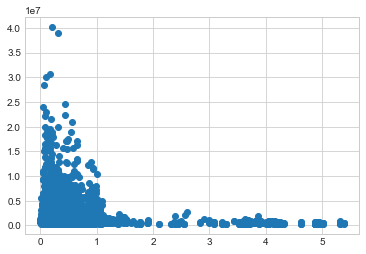

In [190]:
plt.scatter(list(data3.minDistSelectedParks),list(data3.SalePrice))


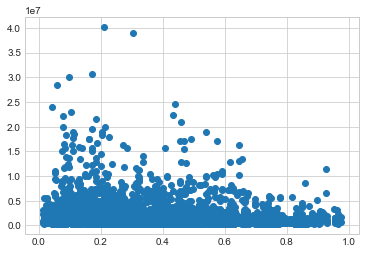

In [191]:
plt.scatter(list(data3.min_dist_park),list(data3.SalePrice))

In [193]:
data3.AptNum.

0          4G
1       House
2       House
3       House
4       House
5       House
6          5B
7          5D
8          8I
9          9E
10        222
11      House
12          1
13         12
14         14
15         16
16         4E
17          2
18         7L
19         4D
20         3K
21         6K
22         4C
23         4E
24         3E
25         5B
26         6D
27         6B
28         1H
29         5F
        ...  
7839       7G
7840      11D
7841       6N
7842      14H
7843       19
7844      RSD
7845       4C
7846       1H
7847       2D
7848      42B
7849       5P
7850       5G
7851       3H
7852       3G
7853       2J
7854      41A
7855       3C
7856       6H
7857       5Y
7858       6F
7859       3G
7860       5G
7861       7G
7862       2E
7863       6D
7864       2L
7865       3H
7866      46A
7867      308
7868      46B
Name: AptNum, Length: 7869, dtype: object

In [215]:
def extract_number(string):
    ls = [int(i) for i in string if i.isdigit()]
    if len(ls)==4:
        return int(ls[0]*10+ls[1])
    elif len(ls)==3:
        return int(ls[0])
    elif len(ls)==2:
        if (ls[0]*10+ls[1])>=60:
            return ls[0]
        else:
            return ls[0]*10+ls[1]
    elif len(ls)==1:
            return ls[0]
    elif "PH" in string:
        return 60
    else:
        return 0

In [216]:
data3["Floor_Proxy"] = data3.AptNum.apply(lambda x : extract_number(x))

In [213]:
data3.to_clipboard()

In [198]:
t = "34A"

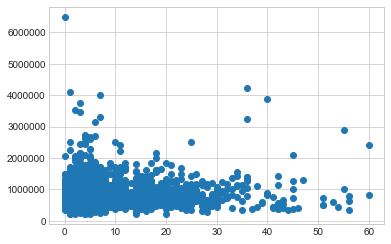

In [222]:
filtered = data3[data3.Beds==1]
plt.scatter(list(filtered.Floor_Proxy),list(filtered.SalePrice))

In [217]:
data3[data3.Floor_Proxy==60]

ZipCode BuildingCategory  TaxClassAtTimeOfSale  Baths  Beds  YearBuilt  \
2201    10001            COOPS                     2      1     1       1963   
2318    10012            COOPS                     2      3     2       1900   
2319    10012            COOPS                     2      3     2       1900   
3406    10003            COOPS                     2      1     1       1929   
3583    10016            COOPS                     2      1     0       1916   

      NumComplaints3moPointOneMile  NumFelonies3moPointOneMile  min_dist_park  \
2201                            11                          19       0.543792   
2318                             0                          14       0.455523   
2319                            17                          24       0.455523   
3406                             7                          20       0.262605   
3583                            16                          29       0.255309   

      min_dist_subway  ... AptNum    BOM_DATE MedianSalesPrice SalesVolume  \
2201         0.238357  ...    PHB  2015-12-01        1016693.0        1263   
2318         0.128847  ...    PHB  2015-05-01         908000.0        1144   
2319         0.128847  ...    PHB  2018-08-01        1049500.0        1194   
3406         0.120449  ...    PHE  2017-09-01        1072500.0        1072   
3583         0.217974  ...    PHF  2018-12-01        1050000.0         880   

                  1YrDate  AvgPriceZipCode1Yr  INC_ID  \
2201  0001-12-09 00:00:00        2.342262e+06   528.0   
2318  0001-05-28 00:00:00        1.886882e+06   827.0   
2319  0001-08-16 00:00:00        1.837860e+06   828.0   
3406  0001-09-28 00:00:00        1.565498e+06  2562.0   
3583  0001-12-19 00:00:00        8.557481e+05  5397.0   

                               GeoCode  minDistSelectedParks Floor_Proxy  
2201  (-73.99756070000001, 40.7536573)              0.543792          60  
2318         (-74.0017447, 40.7251385)              0.455523          60  
2319         (-74.0017447, 40.7251385)              0.455523          60  
3406  (-73.99260699999999, 40.7320735)              0.262605          60  
3583         (-73.9814937, 40.7501409)              0.255309          60  

[5 rows x 22 columns]

In [224]:
leased = pd.read_csv(repo_dir+"FINAL_MERGED_MANHATTAN.csv")

In [227]:
leased_map = leased[["Inc_ID","LEASED"]]

In [228]:
leased_map = leased_map.rename(columns={"Inc_ID":"INC_ID"})

In [230]:
data4 = data3.merge(leased_map, on="INC_ID", how="left")

In [233]:
data4.LEASED = data4.LEASED.fillna(0)

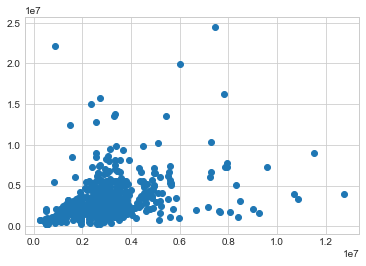

In [346]:
filtered = data5[(data5.Beds==3)]
plt.scatter(list(filtered.AvgPriceZipCode2YrBeds),list(filtered.SalePrice))

In [238]:
data4.to_csv(repo_dir+"data_pre_dummies_leased.csv")

In [333]:
processed = data6.copy(deep=True)

In [334]:
processed.columns

Index(['ZipCode', 'BuildingCategory', 'TaxClassAtTimeOfSale', 'Baths', 'Beds',
       'YearBuilt', 'NumComplaints3moPointOneMile',
       'NumFelonies3moPointOneMile', 'min_dist_park', 'min_dist_subway',
       'SaleDate', 'SalePrice', 'AptNum', 'BOM_DATE', 'MedianSalesPrice',
       'SalesVolume', '1YrDate', 'AvgPriceZipCode1Yr', 'INC_ID', 'GeoCode',
       'minDistSelectedParks', 'Floor_Proxy', 'LEASED',
       'AvgPriceZipCode2YrBeds'],
      dtype='object')

In [335]:
processed = processed.drop(columns=["ZipCode", "TaxClassAtTimeOfSale", "min_dist_park", "SaleDate", "AptNum", "BOM_DATE", "1YrDate","GeoCode"])

In [336]:
buildingCat = pd.get_dummies(processed.BuildingCategory, prefix="BuildCat")
processed[buildingCat.columns] = buildingCat

In [337]:
processed = processed.drop(columns=["BuildingCategory"])

In [254]:
processed.to_csv(repo_dir+"data_final_model_run.csv")

In [338]:
processed1 = processed.copy(deep=True)

In [339]:
processed1["BY_Post_2000"] = 0
processed1["BY_1980_2000"] = 0 
processed1["BY_Pre_1980"] = 0

In [340]:
processed1.loc[processed1.YearBuilt>=2000,"BY_Post_2000"]=1
processed1.loc[(processed1.YearBuilt<2000)&(processed1.YearBuilt>=1980),"BY_1980_2000"]=1
processed1.loc[processed1.YearBuilt<1980,"BY_Pre_1980"]=1

In [341]:
processed1 = processed1.drop(columns=["YearBuilt","MedianSalesPrice"])

In [342]:
processed1.to_csv(repo_dir+"data_final_model_run3.csv")

In [267]:
processed1.to_clipboard()

In [275]:
processed1.to_clipboard()

In [276]:
data5 = data4.copy(deep=True)

In [277]:
data5.

Index(['ZipCode', 'BuildingCategory', 'TaxClassAtTimeOfSale', 'Baths', 'Beds',
       'YearBuilt', 'NumComplaints3moPointOneMile',
       'NumFelonies3moPointOneMile', 'min_dist_park', 'min_dist_subway',
       'SaleDate', 'SalePrice', 'AptNum', 'BOM_DATE', 'MedianSalesPrice',
       'SalesVolume', '1YrDate', 'AvgPriceZipCode1Yr', 'INC_ID', 'GeoCode',
       'minDistSelectedParks', 'Floor_Proxy', 'LEASED'],
      dtype='object')

In [326]:
def calcAvPriceZipCode(dt, zipcode, beds):
    temp = data5[(data5.SaleDate.between(pd.to_datetime(dt-DateOffset(years=2)), dt, inclusive=False))&
                    (data5.ZipCode == zipcode)&(data5.Beds==beds)]
    if len(temp)==0:
        temp=data5[(data5.SaleDate.between(pd.to_datetime(dt-DateOffset(years=2)), dt, inclusive=False))&
                    (data5.Beds==beds)]
        if len(temp)==0:
            temp=data5[(data5.SaleDate.between(pd.to_datetime(dt-DateOffset(years=2)), dt, inclusive=False))&
                    (data5.ZipCode == zipcode)]
    print(len(temp))
    print(i)
    return temp.SalePrice.mean()
    

In [327]:
for i in range(len(data5)):
    data5.loc[i,"AvgPriceZipCode2YrBeds"]=calcAvPriceZipCode(data5.loc[i,"SaleDate"],data5.loc[i,"ZipCode"],data5.loc[i,"Beds"])
    print(data5.loc[i,"AvgPriceZipCode2YrBeds"])

11
0
945045.4545454546
9
1
934444.4444444445
3
2
630333.3333333334
18
3
8440868.888888888
45
4
5292996.511111111
6
5
6362500.0
247
6
1401874.3805668016
5
7
552800.0
6
8
560666.6666666666
8
9
579375.0
4
10
598750.0
1
11
5550000.0
2
12
308500.0
2
13
417000.0
1
14
399000.0
4
15
353000.0
157
16
471316.2547770701
7
17
589857.1428571428
7
18
526285.7142857143
2
19
570000.0
5
20
340188.2
6
21
371990.1666666667
3
22
556666.6666666666
4
23
557500.0
1
24
560000.0
1
25
779000.0
67
26
2295088.194029851
2
27
755000.0
6
28
342656.8333333333
5
29
559400.0
1
30
210000.0
7
31
372420.14285714284
7
32
558571.4285714285
10
33
10354000.0
6
34
368333.3333333333
3
35
347000.0
5
36
706438.2
7
37
710170.1428571428
2
38
1102500.0
4
39
376500.0
5
40
370200.0
7
41
700884.4285714285
9
42
715687.8888888889
8
43
716398.875
15
44
765450.8
20
45
634165.75
25
46
915554.2
28
47
900762.6785714285
18
48
628222.2222222222
3
49
5582500.0
6
50
633166.6666666666
11
51
644818.1818181818
16
52
627375.0
4
53
641250.0
12
54
95460

3218008.5476190476
1
402
9280000.0
48
403
5289130.854166667
10
404
6522564.0
10
405
6522564.0
9
406
366166.6666666667
26
407
756147.8846153846
4
408
362500.0
15
409
561800.0
7
410
346142.85714285716
59
411
809776.4406779661
22
412
529427.6818181818
2
413
410000.0
13
414
369225.3846153846
28
415
571657.4642857143
23
416
524669.9565217391
34
417
639085.5588235294
32
418
631700.28125
38
419
639339.7105263158
53
420
1573736.075471698
20
421
1730350.0
2
422
4800000.0
15
423
2389718.8666666667
44
424
1502227.5454545454
54
425
794209.4444444445
13
426
1248259.076923077
22
427
1308464.2272727273
25
428
1320448.52
11
429
2458272.727272727
9
430
1704555.5555555555
17
431
1505529.4117647058
13
432
1102461.5384615385
79
433
1383313.3797468354
40
434
647391.475
1
435
5875950.0
19
436
5216204.894736842
3
437
1507000.0
21
438
1833928.5714285714
18
439
1755222.2222222222
13
440
8132741.538461538
4
441
6331487.5
15
442
620508.4
18
443
629007.0
141
444
722368.4113475177
15
445
606441.7333333333
6
446
11

765801.2592592592
81
798
766475.6049382716
62
799
766155.2258064516
74
800
1549806.2432432433
14
801
3012109.3571428573
10
802
2461953.1
12
803
419324.0
16
804
430399.25
30
805
451136.56666666665
16
806
430399.25
15
807
429592.5333333333
42
808
764143.4285714285
37
809
778335.1351351351
63
810
767127.3650793651
50
811
768530.48
31
812
1594717.8709677418
35
813
1550507.6
35
814
1550507.6
49
815
1451044.1224489796
13
816
3028425.4615384615
83
817
1521995.9277108433
12
818
2434960.9166666665
14
819
3069571.4285714286
13
820
2539963.923076923
13
821
416299.07692307694
21
822
449626.7619047619
56
823
758094.0535714285
79
824
764329.417721519
172
825
760194.4360465116
70
826
764193.2
86
827
760796.7906976744
76
828
1509745.5526315789
59
829
1502680.7118644067
43
830
1446189.8139534884
16
831
430399.25
46
832
773087.4782608695
201
833
794093.4129353234
73
834
1545351.5342465753
77
835
1514164.4415584416
52
836
692073.1730769231
22
837
3714159.090909091
21
838
3726714.285714286
16
839
4007250.

30
1216
1191900.0
26
1217
1913614.3461538462
27
1218
691544.8518518518
32
1219
1218343.75
37
1220
1289621.6216216215
51
1221
1312235.294117647
57
1222
1269005.9649122807
54
1223
1296018.5185185184
9
1224
1794299.5555555555
66
1225
1219719.1666666667
34
1226
1816538.8235294118
16
1227
409281.25
66
1228
1219719.1666666667
48
1229
1268427.0833333333
15
1230
1867294.6
39
1231
721728.0
50
1232
1292690.0
19
1233
1906962.8421052631
44
1234
727630.5681818182
119
1235
714511.8067226891
29
1236
1221793.103448276
117
1237
1239578.2222222222
6
1238
365750.0
20
1239
1285800.0
1
1240
365000.0
459
1241
1363180.3267973857
161
1242
2617769.763975155
2
1243
377500.0
3
1244
509949.6666666667
4
1245
473625.0
225
1246
473854.6666666667
9
1247
426866.6666666667
6
1248
434083.3333333333
1
1249
810000.0
4
1250
659750.0
6
1251
637000.0
2
1252
679500.0
5
1253
640800.0
189
1254
2629738.08994709
4
1255
418750.0
19
1256
413813.7894736842
1
1257
630000.0
3
1258
444710.0
5
1259
436968.0
8
1260
426562.5
265
1261
5126

3
1628
6426666.666666667
2
1629
14743000.0
6
1630
9596666.666666666
3
1631
5001928.666666667
1
1632
3850000.0
4
1633
9925000.0
27
1634
7949504.481481481
3
1635
9483333.333333334
6
1636
5737235.166666667
7
1637
5774058.714285715
4
1638
5915227.75
3
1639
5426666.666666667
2
1640
11075000.0
3
1641
2950136.6666666665
1
1642
19000000.0
13
1643
932730.7692307692
52
1644
987157.4423076923
18
1645
2395631.0555555555
7
1646
9257857.142857144
2
1647
6452893.0
53
1648
853252.1509433963
17
1649
863323.5294117647
21
1650
2272683.761904762
4
1651
612750.0
44
1652
976708.7954545454
18
1653
852638.8888888889
31
1654
894715.7096774194
14
1655
911821.4285714285
34
1656
892652.5588235294
21
1657
588261.9047619047
14
1658
602750.0
21
1659
845595.2380952381
15
1660
889766.6666666666
75
1661
1020507.6666666666
26
1662
585442.3076923077
36
1663
918060.75
46
1664
976851.8913043478
39
1665
919491.9743589744
22
1666
2219334.5
40
1667
916504.675
5
1668
10856000.0
14
1669
602750.0
8
1670
3009669.875
23
1671
22038

869958.3333333334
1
2029
637000.0
29
2030
853261.1724137932
3
2031
1098000.0
17
2032
876676.4705882353
2
2033
872000.0
1
2034
637000.0
165
2035
993689.5333333333
1
2036
487500.0
8
2037
561687.5
16
2038
858343.75
15
2039
832233.3333333334
21
2040
798955.9047619047
9
2041
805500.0
84
2042
899969.0357142857
8
2043
841500.0
3
2044
765666.6666666666
4
2045
1037250.0
77
2046
1814387.038961039
4
2047
570625.0
45
2048
567555.5555555555
114
2049
1522158.3771929825
1
2050
485000.0
2
2051
2675000.0
2
2052
481250.0
6
2053
6769833.333333333
23
2054
8113444.739130435
84
2055
680472.1547619047
49
2056
724074.612244898
20
2057
1530623.6
19
2058
1189931.1578947369
1
2059
1277270.0
9
2060
373727.77777777775
16
2061
466750.0
1
2062
300144.0
40
2063
433517.05
1
2064
2100000.0
2
2065
1488000.0
6
2066
396666.6666666667
1
2067
482500.0
1
2068
800000.0
1
2069
2100000.0
3
2070
2700000.0
17
2071
3251617.6470588236
10
2072
366369.4
55
2073
566745.4545454546
1
2074
485000.0
54
2075
859678.0370370371
10
2076
85995

1415876.5866666667
11
2415
957954.5454545454
86
2416
1277360.3604651163
0
2417
nan
7
2418
392000.0
8
2419
403000.0
23
2420
503868.652173913
48
2421
483233.7291666667
5
2422
781200.0
126
2423
761287.0158730159
9
2424
749277.7777777778
84
2425
808789.4047619047
4
2426
13151250.0
3
2427
9331333.333333334
2
2428
7325000.0
1
2429
550000.0
4
2430
548125.0
79
2431
679922.7088607595
12
2432
501416.6666666667
104
2433
620592.5192307692
5
2434
562400.0
9
2435
523000.0
10
2436
649990.0
42
2437
602888.0238095238
3
2438
343833.3333333333
30
2439
390633.3333333333
18
2440
516057.6111111111
19
2441
514291.4210526316
149
2442
648213.033557047
2
2443
386250.0
33
2444
416030.30303030304
4
2445
628000.0
80
2446
628626.2125
13
2447
489769.23076923075
54
2448
631686.9814814815
18
2449
3151527.777777778
16
2450
2562863.0
17
2451
505237.4705882353
2
2452
2912500.0
35
2453
3143559.1428571427
11
2454
3837500.0
1
2455
769500.0
88
2456
1337960.125
6
2457
810333.3333333334
25
2458
669047.96
38
2459
689124.6052631

2809
649000.0
5
2810
1650000.0
32
2811
1540578.125
4
2812
704750.0
9
2813
654055.5555555555
5
2814
1233800.0
20
2815
903692.75
117
2816
889373.8974358974
22
2817
910629.7727272727
109
2818
878070.4311926606
15
2819
806163.2666666667
94
2820
882469.2446808511
5
2821
683800.0
3
2822
1545000.0
15
2823
1718894.2666666666
7
2824
693214.2857142857
5
2825
5176800.0
6
2826
498083.3333333333
2
2827
523750.0
9
2828
715277.7777777778
36
2829
937994.1666666666
7
2830
498214.28571428574
11
2831
828863.6363636364
6
2832
4772333.333333333
9
2833
1528555.5555555555
7
2834
1514285.7142857143
12
2835
720859.3333333334
14
2836
793960.6428571428
4
2837
1600000.0
28
2838
1528071.4285714286
6
2839
1566666.6666666667
20
2840
867925.0
13
2841
1583846.1538461538
12
2842
1545833.3333333333
24
2843
836208.3333333334
56
2844
855225.25
4
2845
701625.0
1
2846
17000000.0
5
2847
1414816.0
27
2848
2360369.5185185187
6
2849
1261839.1666666667
36
2850
2176249.361111111
8
2851
951250.0
14
2852
895750.0
1
2853
5137500.0
1

573649.1428571428
19
3217
552162.5263157894
4
3218
944750.0
12
3219
602590.6666666666
24
3220
559774.5
20
3221
551029.4
42
3222
601204.7619047619
4
3223
448750.0
27
3224
539299.5555555555
5
3225
825800.0
22
3226
551572.1818181818
28
3227
548163.8571428572
21
3228
550266.0952380953
8
3229
809875.0
14
3230
8583928.57142857
9
3231
617676.4444444445
15
3232
568805.8666666667
42
3233
567026.1904761905
10
3234
596908.8
23
3235
562808.1739130435
18
3236
560116.0
25
3237
553543.52
17
3238
559240.4705882353
38
3239
645344.7368421053
27
3240
546058.8148148148
26
3241
548214.9230769231
6
3242
778166.6666666666
4
3243
448750.0
3
3244
455000.0
13
3245
583160.6153846154
26
3246
542157.2307692308
16
3247
564505.5
3
3248
976810.0
3
3249
993000.0
92
3250
2194553.065217391
11
3251
589189.8181818182
1
3252
750430.0
10
3253
837800.0
2
3254
765215.0
3
3255
6241666.666666667
19
3256
797003.8947368421
11
3257
737574.1818181818
6
3258
695198.5
20
3259
1593675.0
24
3260
1586604.1666666667
24
3261
862625.0
19
3

51
3624
646013.7058823529
60
3625
617211.65
57
3626
622292.9649122807
46
3627
1221144.7608695652
73
3628
694045.9589041095
75
3629
700138.0666666667
42
3630
1198235.9285714286
48
3631
1196734.3125
49
3632
1199351.9795918367
34
3633
1225217.6176470588
32
3634
1191481.21875
6
3635
2997166.6666666665
82
3636
578383.5243902439
88
3637
567925.5568181818
89
3638
566319.6516853933
52
3639
641474.9807692308
52
3640
641474.9807692308
71
3641
600354.9154929577
58
3642
620529.2931034482
90
3643
708591.6444444444
100
3644
771509.98
77
3645
702783.8311688312
86
3646
708642.4186046511
87
3647
707853.4252873564
69
3648
697468.9130434783
31
3649
1216496.7419354839
84
3650
704979.1428571428
23
3651
1202778.2173913044
41
3652
1201363.6341463414
24
3653
1196412.4583333333
27
3654
1197181.4444444445
72
3655
696532.7083333334
92
3656
705437.4782608695
103
3657
768330.0776699029
29
3658
1226599.9655172413
26
3659
1184573.0384615385
74
3660
593296.6081081082
85
3661
572781.7529411765
72
3662
598440.263888888

7
3972
895714.2857142857
5
3973
807000.0
19
3974
1736236.8421052631
32
3975
493764.96875
66
3976
796466.8181818182
100
3977
1608590.99
109
3978
1598996.3211009174
61
3979
1610532.9836065574
73
3980
1593538.3424657534
72
3981
1590740.263888889
36
3982
2814025.222222222
84
3983
1614920.2261904762
6
3984
3987166.6666666665
25
3985
501359.16
79
3986
802833.0379746836
72
3987
805066.8055555555
82
3988
799552.5609756098
87
3989
1617968.9540229884
23
3990
2609381.8695652173
33
3991
2822629.787878788
42
3992
2739943.880952381
42
3993
2739943.880952381
40
3994
497080.475
43
3995
494586.488372093
99
3996
1616405.0404040404
67
3997
795892.6865671641
108
3998
1599727.7685185184
66
3999
1621178.7727272727
64
4000
1620512.484375
62
4001
1611008.2580645161
106
4002
1605194.3301886793
89
4003
1618351.6741573033
26
4004
502268.42307692306
35
4005
500263.4
24
4006
505790.7916666667
34
4007
503196.73529411765
39
4008
496005.6153846154
103
4009
776705.0
95
4010
1621779.9894736842
76
4011
809372.5
103
4012

69
4318
1437257.1594202898
32
4319
1735094.09375
9
4320
8133438.888888889
19
4321
2549253.052631579
12
4322
1185750.0
41
4323
691871.5853658536
22
4324
720624.3181818182
5
4325
365000.0
53
4326
688183.6603773584
65
4327
673672.8307692307
10
4328
1230350.0
25
4329
1350520.0
6
4330
2922833.3333333335
72
4331
631522.1805555555
74
4332
634589.1486486486
18
4333
1418226.111111111
69
4334
1371663.2318840579
68
4335
1379187.6911764706
91
4336
618880.4615384615
49
4337
1496132.918367347
64
4338
1399742.390625
46
4339
3149034.1304347827
23
4340
3061326.086956522
53
4341
628982.962264151
41
4342
598568.2195121951
74
4343
1360740.0405405406
15
4344
1382004.6666666667
25
4345
3068420.0
43
4346
3064548.1395348837
39
4347
1652561.8205128205
27
4348
384812.22222222225
108
4349
705941.574074074
112
4350
704881.1607142857
110
4351
706742.6363636364
71
4352
726539.2957746478
78
4353
722968.4615384615
91
4354
726973.5164835164
86
4355
731666.7441860465
45
4356
1571531.3555555556
60
4357
1469275.35
66
435

79
4664
1670386.0632911392
44
4665
3423572.727272727
110
4666
1647680.5272727273
44
4667
450497.8181818182
163
4668
753610.0797546012
144
4669
750002.3819444445
110
4670
769692.9454545454
134
4671
751843.8134328359
114
4672
759686.1754385965
101
4673
767168.0594059406
63
4674
448205.5238095238
161
4675
753468.5900621118
115
4676
759854.1217391305
106
4677
1652287.3773584906
123
4678
1685291.5609756098
154
4679
758591.1883116884
102
4680
764989.9411764706
95
4681
765726.0421052632
136
4682
752331.4044117647
169
4683
759384.2781065089
109
4684
1643829.9266055045
126
4685
757548.1825396825
153
4686
757046.0326797386
74
4687
706760.027027027
90
4688
1639187.3111111112
112
4689
1670936.232142857
96
4690
723593.7708333334
103
4691
723064.0970873786
16
4692
5245839.875
56
4693
3510936.6071428573
142
4694
752132.6971830986
89
4695
765320.4943820224
149
4696
758617.7382550335
171
4697
759669.2573099416
204
4698
795670.4705882353
101
4699
1649922.396039604
130
4700
1692706.6307692307
127
4701
16

1823414.4186046512
93
5009
724978.5161290322
87
5010
1222901.896551724
125
5011
740148.648
104
5012
723226.9423076923
112
5013
735761.8839285715
16
5014
493218.75
21
5015
474547.61904761905
105
5016
1675703.4095238096
66
5017
1900148.8636363635
122
5018
1222524.1967213114
19
5019
419131.5789473684
91
5020
695650.4285714285
54
5021
1836283.7962962964
119
5022
1227117.3529411764
84
5023
1217886.488095238
9
5024
4082543.6666666665
73
5025
1233841.98630137
56
5026
1821773.6607142857
58
5027
1833091.8103448276
74
5028
698315.5945945946
104
5029
1237494.8557692308
83
5030
688064.5060240964
76
5031
693162.552631579
101
5032
698219.6930693069
112
5033
1221602.3660714286
82
5034
1219420.3048780488
64
5035
709864.890625
47
5036
1825145.1063829786
69
5037
1891338.043478261
38
5038
1868297.894736842
104
5039
1237494.8557692308
75
5040
694604.72
20
5041
431200.0
69
5042
1232702.391304348
49
5043
1801261.7346938776
70
5044
706433.6142857143
42
5045
1845043.3333333333
118
5046
1232749.7033898304
93
5

28
5414
1243964.2857142857
38
5415
580039.4736842106
41
5416
574768.2926829269
18
5417
1199788.4444444445
13
5418
1023476.3076923077
21
5419
1147080.5714285714
47
5420
470010.25531914894
37
5421
546932.4324324324
36
5422
540736.1111111111
38
5423
552671.052631579
35
5424
506642.85714285716
46
5425
696296.8695652174
44
5426
630329.5454545454
35
5427
506642.85714285716
28
5428
1223286.142857143
19
5429
1176510.105263158
1
5430
995000.0
60
5431
852129.2166666667
13
5432
992322.4615384615
3
5433
20433166.666666668
64
5434
7078890.53125
39
5435
654310.2564102564
51
5436
626971.4705882353
89
5437
908534.9325842697
91
5438
893759.4395604396
47
5439
635224.3617021276
70
5440
909065.8428571429
70
5441
909065.8428571429
100
5442
874331.77
40
5443
570252.5
97
5444
883888.4226804124
115
5445
886963.0086956521
92
5446
888935.9673913043
90
5447
903773.4333333333
83
5448
917188.0602409638
39
5449
662515.3846153846
43
5450
600246.5116279069
41
5451
586002.4390243902
75
5452
901328.12
109
5453
879354.8

47
5826
2408406.744680851
14
5827
8081835.714285715
38
5828
2189999.3947368423
112
5829
1022276.7321428572
84
5830
1024413.0476190476
102
5831
1041622.4901960784
82
5832
1021737.987804878
82
5833
1021737.987804878
91
5834
1027642.7912087912
90
5835
1030816.6
107
5836
1031079.3831775701
92
5837
1024461.8913043478
60
5838
976267.9166666666
59
5839
979001.2711864407
48
5840
616963.7916666666
37
5841
579782.7567567568
68
5842
1016184.9264705882
87
5843
1049856.2528735632
89
5844
1040758.3595505618
68
5845
1016184.9264705882
64
5846
988758.984375
51
5847
605926.7058823529
40
5848
594099.05
41
5849
592413.7073170731
65
5850
992470.3846153846
89
5851
1026528.0224719101
66
5852
997887.5
60
5853
976267.9166666666
47
5854
568404.2553191489
47
5855
568404.2553191489
46
5856
568804.3478260869
76
5857
1812602.6578947369
51
5858
569215.6862745098
54
5859
567148.1481481482
39
5860
583333.3333333334
54
5861
567518.5185185185
109
5862
921124.1743119266
137
5863
968870.3795620438
49
5864
1597382.3469387

91
6164
1294929.4395604397
77
6165
1293468.2987012987
104
6166
1418345.5673076923
112
6167
718311.2946428572
127
6168
718218.0787401575
137
6169
721178.4379562044
87
6170
1302713.551724138
102
6171
1408019.0098039217
102
6172
1408019.0098039217
99
6173
1397832.7171717172
73
6174
1276329.7945205478
28
6175
2753928.5714285714
86
6176
1288791.6162790698
53
6177
7684735.490566038
33
6178
475947.51515151514
42
6179
472494.4761904762
142
6180
724253.1408450705
146
6181
722116.0684931506
139
6182
727114.7194244604
30
6183
473950.0
102
6184
705101.6274509804
105
6185
715589.1904761905
104
6186
716412.1634615385
145
6187
722268.5931034483
99
6188
705215.8181818182
35
6189
470393.3714285714
75
6190
1295094.3333333333
141
6191
722368.4113475177
130
6192
718728.4307692308
99
6193
1397832.7171717172
38
6194
469546.5263157895
107
6195
712166.9626168224
130
6196
718728.4307692308
120
6197
717707.2083333334
124
6198
718383.0322580645
88
6199
1307739.5340909092
29
6200
478913.7931034483
112
6201
718311

5037898.333333333
35
6510
2317740.1714285715
62
6511
1246437.9032258065
63
6512
1170121.2698412698
62
6513
1155929.677419355
65
6514
1186425.2307692308
38
6515
575959.5263157894
79
6516
1022791.3291139241
33
6517
2241847.787878788
34
6518
2321644.294117647
59
6519
1191726.6101694915
14
6520
5219176.785714285
10
6521
5634270.0
41
6522
2707390.2439024393
64
6523
1075142.8125
34
6524
2392258.794117647
42
6525
593070.5238095238
76
6526
1014672.0394736842
85
6527
1021184.6588235294
109
6528
1030577.9266055046
42
6529
2474050.404761905
42
6530
3218008.5476190476
12
6531
4870066.666666667
31
6532
2813193.5483870967
16
6533
4651925.0
59
6534
1214099.4915254237
35
6535
2476765.685714286
37
6536
2504102.6756756757
9
6537
5121411.111111111
36
6538
2362522.1944444445
13
6539
5734053.846153846
38
6540
2566605.263157895
11
6541
5585700.0
30
6542
2305999.2333333334
6
6543
1587383.3333333333
9
6544
1668111.111111111
7
6545
1734000.0
35
6546
3020578.8285714285
24
6547
4412908.333333333
25
6548
4340392.

130
6860
718728.4307692308
75
6861
904258.6666666666
49
6862
880760.2040816327
23
6863
426717.39130434784
47
6864
881750.0
38
6865
707375.0
44
6866
885846.5909090909
67
6867
889685.0746268657
50
6868
881445.0
50
6869
1715620.0
39
6870
1683910.2564102565
30
6871
3198225.0
20
6872
3000587.5
21
6873
3039845.238095238
9
6874
7784029.111111111
73
6875
905217.8082191781
58
6876
880004.3103448276
51
6877
1719431.3725490195
63
6878
1698079.365079365
34
6879
1645441.1764705882
64
6880
1709046.875
29
6881
3138336.206896552
26
6882
3145644.230769231
46
6883
2650209.6304347827
48
6884
2657533.2916666665
3
6885
18000000.0
3
6886
18000000.0
25
6887
2620232.32
17
6888
423852.9411764706
56
6889
877772.3214285715
56
6890
877772.3214285715
70
6891
897912.8571428572
40
6892
1694312.5
38
6893
707375.0
24
6894
2621075.3333333335
98
6895
1398524.887755102
32
6896
2693125.0
31
6897
464483.87096774194
53
6898
898627.358490566
29
6899
468620.6896551724
27
6900
465037.037037037
35
6901
1675571.4285714286
51
690

75
7202
1446260.0
41
7203
2516095.1219512196
90
7204
1432105.5555555555
38
7205
2554605.263157895
112
7206
1422837.2857142857
94
7207
1435833.7765957448
77
7208
669985.6363636364
107
7209
685757.7196261683
96
7210
682997.8541666666
65
7211
1456169.2307692308
35
7212
412785.71428571426
28
7213
367785.71428571426
161
7214
661424.4409937888
158
7215
659418.2594936709
110
7216
1403404.4090909092
32
7217
4390563.9375
166
7218
666921.4397590362
74
7219
2990763.418918919
11
7220
7511090.909090909
29
7221
382689.6551724138
159
7222
673701.5849056604
165
7223
667508.6363636364
165
7224
667508.6363636364
139
7225
637800.2517985612
119
7226
1407250.218487395
115
7227
1410719.7913043478
59
7228
3164780.8474576273
88
7229
684804.4772727273
64
7230
1445328.125
95
7231
1442903.9473684211
16
7232
5136625.0
97
7233
683851.2989690722
165
7234
670457.8909090909
124
7235
629468.7258064516
118
7236
625335.779661017
146
7237
644131.7465753425
128
7238
631907.203125
128
7239
1407310.75
148
7240
645284.087837

137
7543
735528.9708029197
153
7544
784393.7058823529
158
7545
1639968.0886075948
73
7546
2936349.02739726
168
7547
1632094.8988095238
34
7548
462985.29411764705
165
7549
1657586.0545454544
135
7550
1664521.1703703704
132
7551
1664699.6818181819
169
7552
1629449.3668639052
64
7553
3274033.265625
21
7554
4577425.619047619
149
7555
763683.6845637584
149
7556
1645627.2348993288
105
7557
710204.7333333333
101
7558
693768.9405940594
114
7559
717928.9912280702
124
7560
716791.5161290322
103
7561
703340.7669902913
70
7562
1903832.0
120
7563
1251441.2666666666
115
7564
1253973.4956521739
109
7565
716385.5229357798
78
7566
1922166.5384615385
27
7567
478425.9259259259
32
7568
467234.375
35
7569
447185.71428571426
31
7570
468919.3548387097
131
7571
732011.213740458
151
7572
782263.1589403973
129
7573
732786.5813953489
65
7574
3082509.676923077
159
7575
786885.1383647799
148
7576
776024.0810810811
132
7577
730632.3409090909
151
7578
785309.5165562914
149
7579
769562.8791946309
152
7580
781875.4210

In [331]:
data6=data5.dropna(subset=["AvgPriceZipCode2YrBeds"])

In [332]:
data6.shape

(7865, 24)